In [1]:
'''
@File    :   thend.ipynb
@Time    :   2023/07/23 14:57:22
@Author  :   Ravi K.
@Desc    :   A notebook for testing combination of everything we have done.
'''

'\n@File    :   thend.ipynb\n@Time    :   2023/07/23 14:57:22\n@Author  :   Ravi K.\n@Desc    :   A notebook for testing combination of everything we have done.\n'

In [1]:
import final_script as fs
import numpy as np
import processing_functions as pf
import matplotlib.pyplot as plt
import os
import glob
from scipy.stats import skewnorm
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import matplotlib.backends.backend_pdf
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'figure.dpi':150,
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [3]:
os.makedirs("/home/ravioli/astro/ksp/grb/GRB210730A/1s/master_lc")

In [7]:
data = fits.getdata("/home/ravioli/astro/ksp/grb/GRB160909A/master_lc/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc")
trigger_times = np.concatenate((np.linspace(211079641.5+400, 211083090.5-100, 5), np.linspace(211084277.5+100, 211085869.5-100, 2)))
print(data['TIME'][0], data['TIME'][fs.get_saa_indices(data)[0]], data['TIME'][fs.get_saa_indices(data)[-1]], data['TIME'][-1])

211079641.5 211083090.5 211084277.5 211085869.5


In [15]:
a = np.array([1,2,0,5])
np.nonzero(a)

(array([0, 1, 3]),)

In [11]:
# for trigger_time in trigger_times:
timebins = [0.2, 0.4, 0.8, 1, 2, 4, 8]
snr = []
for timebin in timebins:
    grb_name = "GRB210709A"
    trigger_time = 363502145.0
    # timebin = 0.8
    results = fs.find_outliers("/home/ravioli/astro/ksp/grb/GRB210709A", trigger_time, timebin, detection_sigma=1)
    master_lcs = results[4]
    lc_paths = np.sort(glob.glob(f"{results[5][0]}/*.lc"))

    potential_grb_snrs = fs.find_potential_grbs(master_lcs, lc_paths, trigger_time, results, timebin, grb_name, plot=False)
    snr.append(np.mean(potential_grb_snrs))

Master light curve already exists at /home/ravioli/astro/ksp/grb/GRB210709A/0.2s/master_lc
0.2s: Requested energy bins already exist at /home/ravioli/astro/ksp/grb/GRB210709A/0.2s/3_bins
Potential GRB found in Quadrant 0 at 363502147.5000524s with SNR 7.15!!!!
Potential GRB found in Quadrant 1 at 363502147.3000524s with SNR 4.76!!!!
Potential GRB found in Quadrant 3 at 363502147.5000524s with SNR 4.31!!!!
Potential GRB found for trigger time 363502145.0s.
Master light curve already exists at /home/ravioli/astro/ksp/grb/GRB210709A/0.4s/master_lc
0.4s: Requested energy bins already exist at /home/ravioli/astro/ksp/grb/GRB210709A/0.4s/3_bins
Potential GRB found in Quadrant 0 at 363502147.60005236s with SNR 7.36!!!!
Potential GRB found in Quadrant 1 at 363502147.60005236s with SNR 5.26!!!!
Potential GRB found for trigger time 363502145.0s.
Master light curve already exists at /home/ravioli/astro/ksp/grb/GRB210709A/0.8s/master_lc
0.8s: Requested energy bins already exist at /home/ravioli/as

In [14]:
from matplotlib.backends.backend_pdf import PdfPages
fig, ax = plt.subplots(figsize=(15, 10), sharex=True, sharey=True)
ax.plot(
    timebins,
    snr,
    color="slateblue",
    marker="o",
    markersize=7,
    linewidth=2,
    linestyle="--",
)
ax.set_xlabel("Timebin (s)")
ax.set_ylabel("SNR")
ax.set_title(f"SNR vs Timebin for {grb_name}")
pdf = PdfPages(f"output_for_{grb_name}.pdf")
pdf.savefig(fig)
pdf.close()
plt.close()

Creating master light curve at /home/ravioli/astro/ksp/grbhunters/GRB190928A/1s/1s/master_lc


[ cztbindata.cpp:437] ----------------------------------------------------------------------------
[ cztbindata.cpp:438]                           CZTBINDATA PARAMETERS                            
[ cztbindata.cpp:439] ----------------------------------------------------------------------------
[ cztbindata.cpp:440] Modulename                        : cztbindata_v3.0
[ cztbindata.cpp:441] Input Event file                  : /home/ravioli/astro/ksp/grbhunters/GRB190928A/1s/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean.evt
[ cztbindata.cpp:442] MKF file                          : /home/ravioli/astro/ksp/grbhunters/GRB190928A/1s/AS1A06_002T02_9000003206_21631czt_level2.mkf
[ cztbindata.cpp:443] Input badpix file                 : /home/ravioli/astro/ksp/grbhunters/GRB190928A/1s/AS1A06_002T02_9000003206_21631cztM0_level2_quad_badpix_out.fits
[ cztbindata.cpp:444] Input livetime file               : /home/ravioli/astro/ksp/grbhunters/GRB190928A/1s/AS1A06_002T02_9000003206_21631cztM0



 Moving light curves to /home/ravioli/astro/ksp/grbhunters/GRB190928A/1s/1s/master_lc 


1s: Creating 3 energy bins at /home/ravioli/astro/ksp/grbhunters/GRB190928A/1s/1s/3_bins
20 60


[ cztbindata.cpp:1267] Finished reading event list for quadrant 0
[ cztbindata.cpp:1361] Time dependant gain correction factor for 1461.53 days: 1.00106
[ utils.cpp:1605] Template file used : /home/ravioli/czti_pipeline/czti/templates/lcTemplate
[ cztHeaderParam.cpp:314] Read all the header keywords
[ cztHeaderParam.cpp:531] Copied all the header keywords sucessfully
[ cztbindata.cpp:1040] Event file has QUAD GTI. Spectrum/lc of quadrants will be generated separately
[ cztbindata.cpp:1155] ******QUAD****** IS 1
[ cztbindata.cpp:1267] Finished reading event list for quadrant 1
[ cztbindata.cpp:1361] Time dependant gain correction factor for 1461.53 days: 1.00106
[ utils.cpp:1605] Template file used : /home/ravioli/czti_pipeline/czti/templates/lcTemplate
[ cztHeaderParam.cpp:314] Read all the header keywords
[ cztHeaderParam.cpp:531] Copied all the header keywords sucessfully
[ cztbindata.cpp:1040] Event file has QUAD GTI. Spectrum/lc of quadrants will be generated separately
[ cztbindat



 Moving light curves to /home/ravioli/astro/ksp/grbhunters/GRB190928A/1s/1s/3_bins/20-60/


60 100


[ cztbindata.cpp:1267] Finished reading event list for quadrant 0
[ cztbindata.cpp:1361] Time dependant gain correction factor for 1461.53 days: 1.00106
[ utils.cpp:1605] Template file used : /home/ravioli/czti_pipeline/czti/templates/lcTemplate
[ cztHeaderParam.cpp:314] Read all the header keywords
[ cztHeaderParam.cpp:531] Copied all the header keywords sucessfully
[ cztbindata.cpp:1040] Event file has QUAD GTI. Spectrum/lc of quadrants will be generated separately
[ cztbindata.cpp:1155] ******QUAD****** IS 1
[ cztbindata.cpp:1267] Finished reading event list for quadrant 1
[ cztbindata.cpp:1361] Time dependant gain correction factor for 1461.53 days: 1.00106
[ utils.cpp:1605] Template file used : /home/ravioli/czti_pipeline/czti/templates/lcTemplate
[ cztHeaderParam.cpp:314] Read all the header keywords
[ cztHeaderParam.cpp:531] Copied all the header keywords sucessfully
[ cztbindata.cpp:1040] Event file has QUAD GTI. Spectrum/lc of quadrants will be generated separately
[ cztbindat



 Moving light curves to /home/ravioli/astro/ksp/grbhunters/GRB190928A/1s/1s/3_bins/60-100/


100 200


[ cztbindata.cpp:1267] Finished reading event list for quadrant 0
[ cztbindata.cpp:1361] Time dependant gain correction factor for 1461.53 days: 1.00106
[ utils.cpp:1605] Template file used : /home/ravioli/czti_pipeline/czti/templates/lcTemplate
[ cztHeaderParam.cpp:314] Read all the header keywords
[ cztHeaderParam.cpp:531] Copied all the header keywords sucessfully
[ cztbindata.cpp:1040] Event file has QUAD GTI. Spectrum/lc of quadrants will be generated separately
[ cztbindata.cpp:1155] ******QUAD****** IS 1
[ cztbindata.cpp:1267] Finished reading event list for quadrant 1
[ cztbindata.cpp:1361] Time dependant gain correction factor for 1461.53 days: 1.00106
[ utils.cpp:1605] Template file used : /home/ravioli/czti_pipeline/czti/templates/lcTemplate
[ cztHeaderParam.cpp:314] Read all the header keywords
[ cztHeaderParam.cpp:531] Copied all the header keywords sucessfully
[ cztbindata.cpp:1040] Event file has QUAD GTI. Spectrum/lc of quadrants will be generated separately
[ cztbindat



 Moving light curves to /home/ravioli/astro/ksp/grbhunters/GRB190928A/1s/1s/3_bins/100-200/


Potential GRB found in Quadrant 0 at 307372436.5s with SNR 84.23!!!!
Potential GRB found in Quadrant 1 at 307372437.5s with SNR 63.36!!!!
Potential GRB found in Quadrant 2 at 307372431.5s with SNR 56.0!!!!
Potential GRB found in Quadrant 3 at 307372430.5s with SNR 37.73!!!!
Potential GRB found for trigger time 307372377.0s.


/home/ravioli/miniconda3/envs/astro/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: unsupported operand type(s) for /: 'Figure' and 'int'

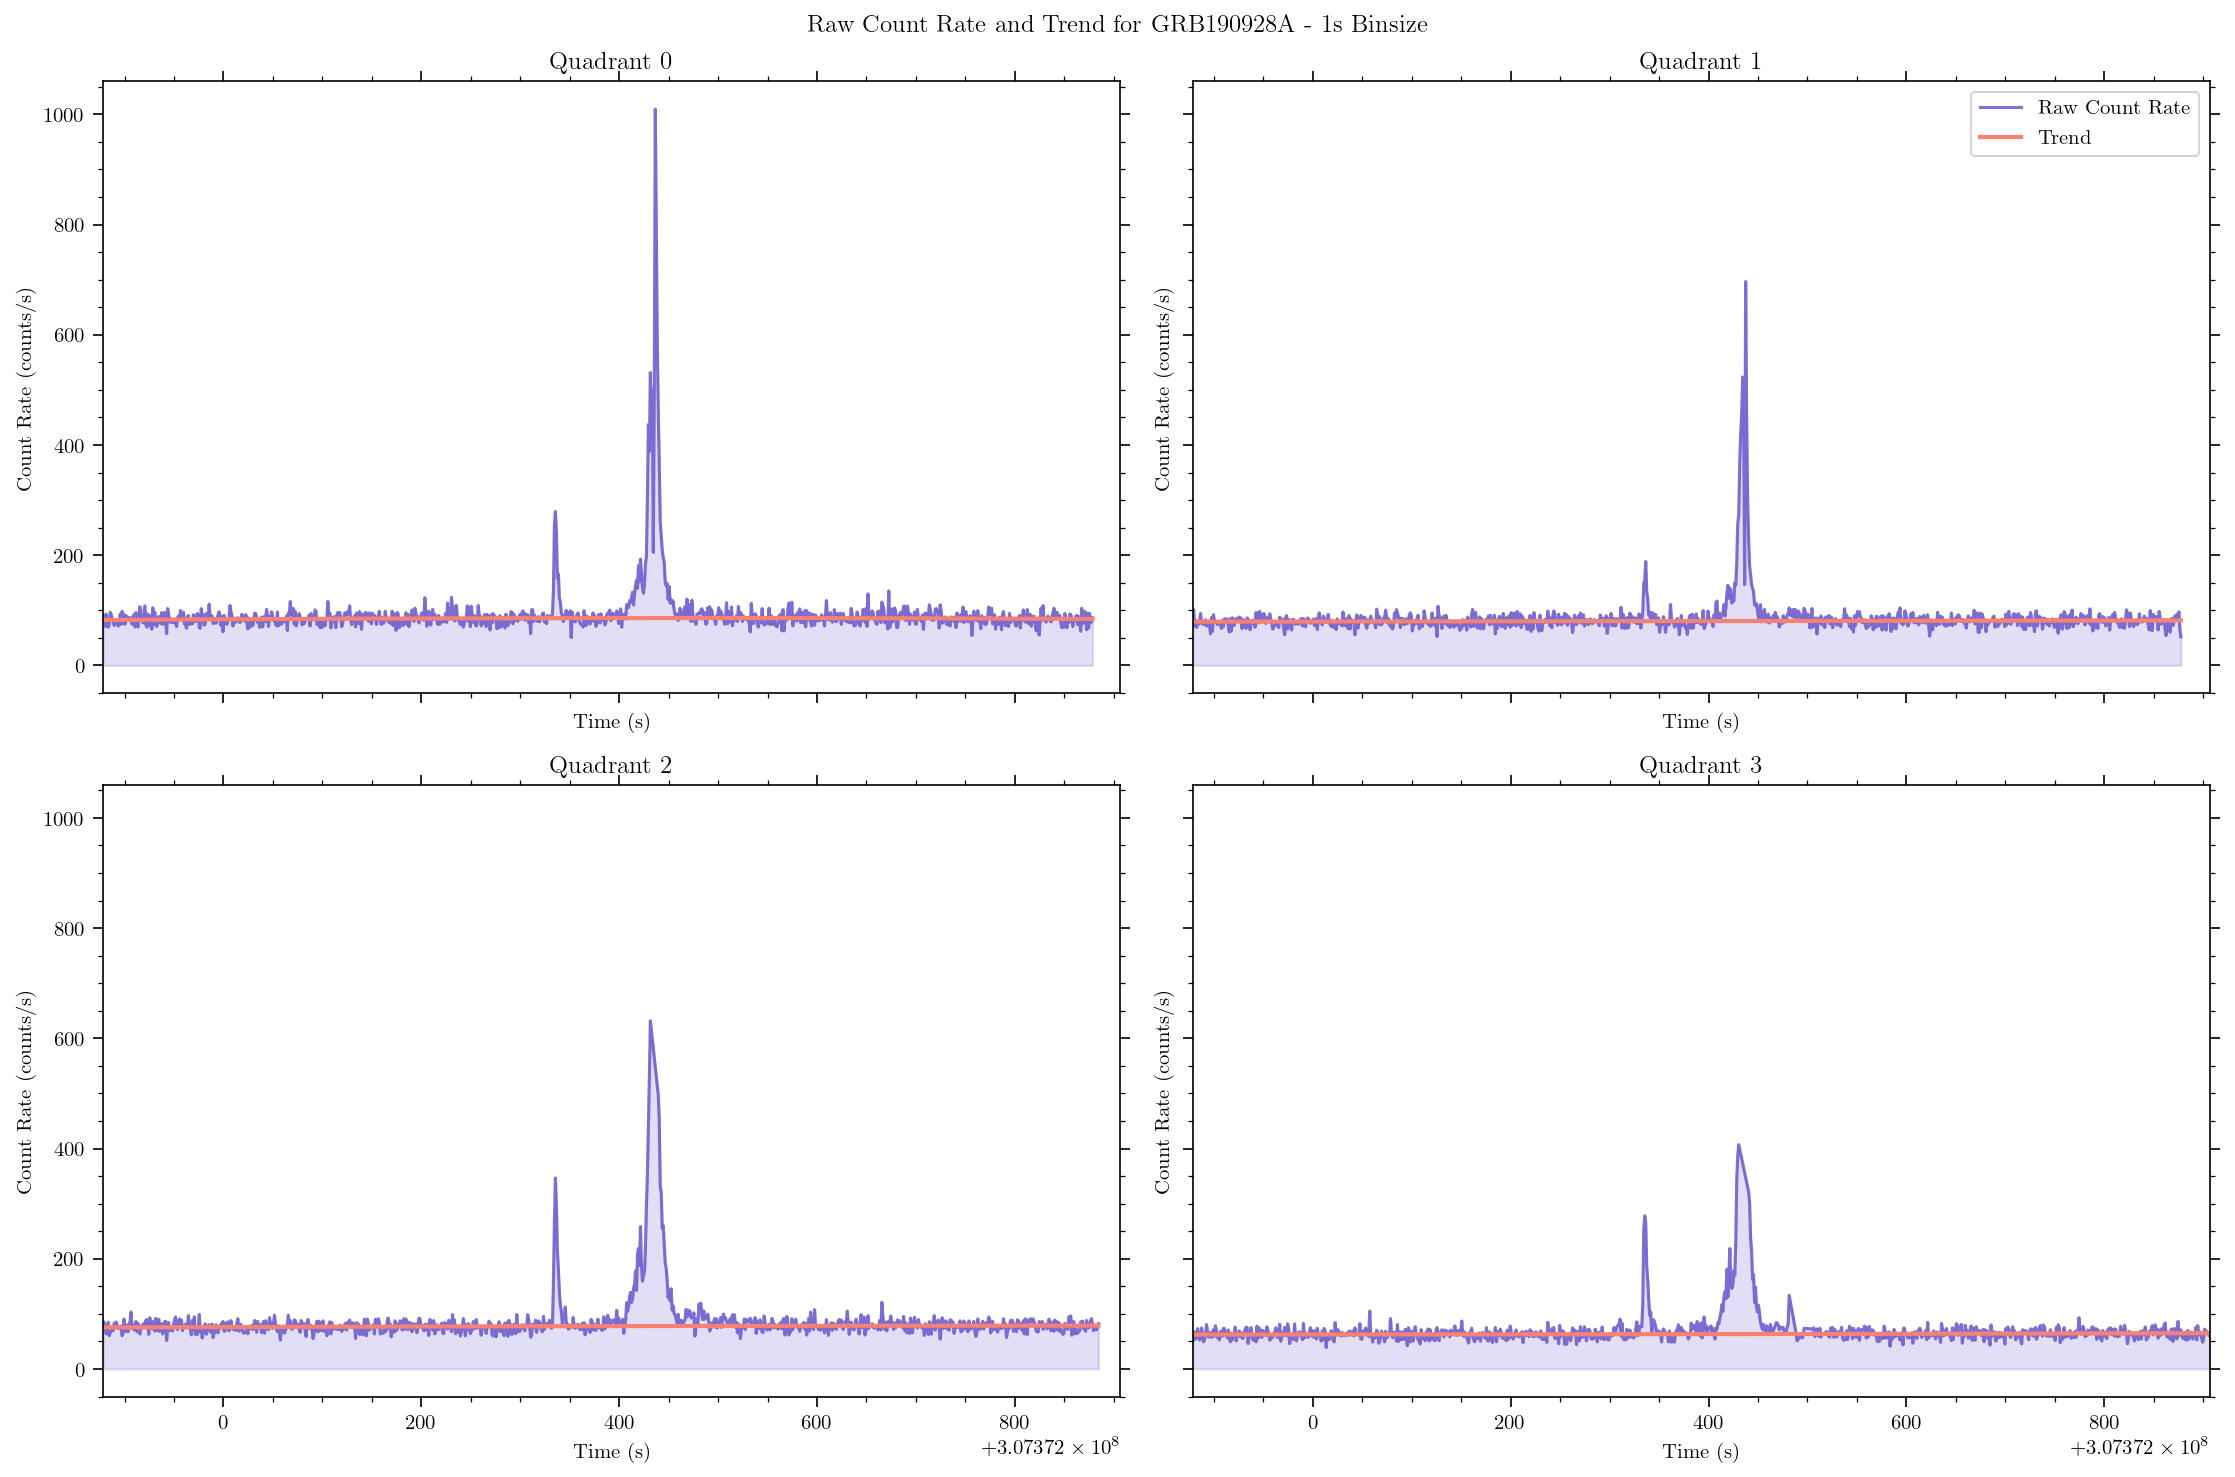

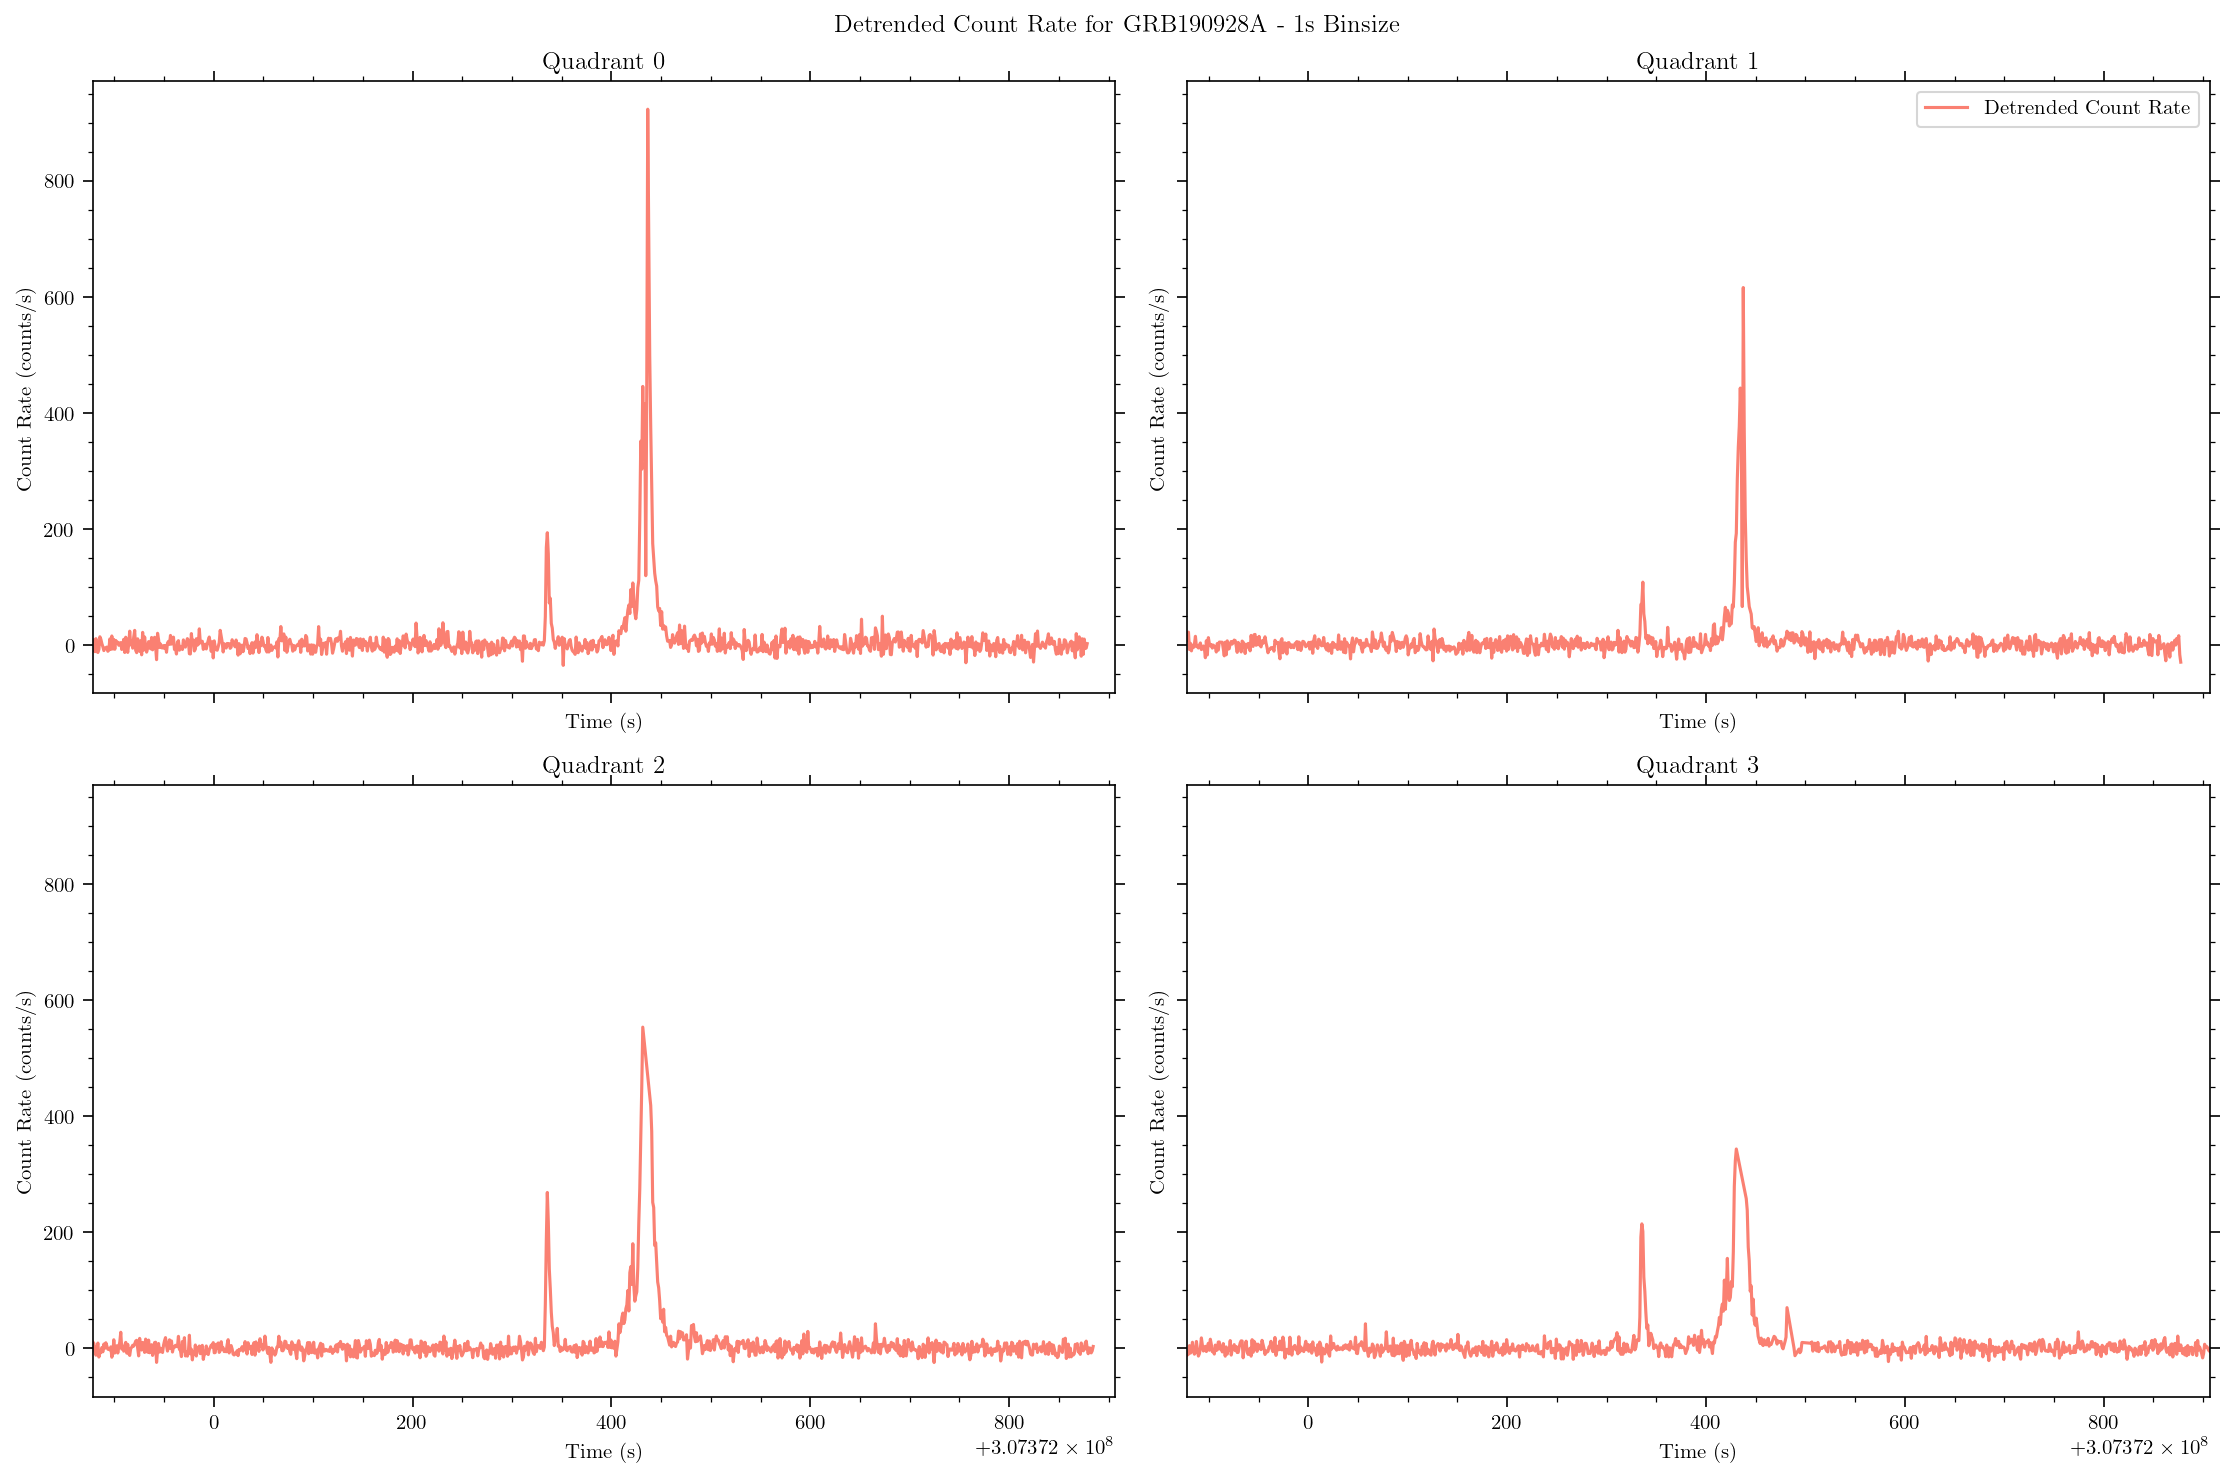

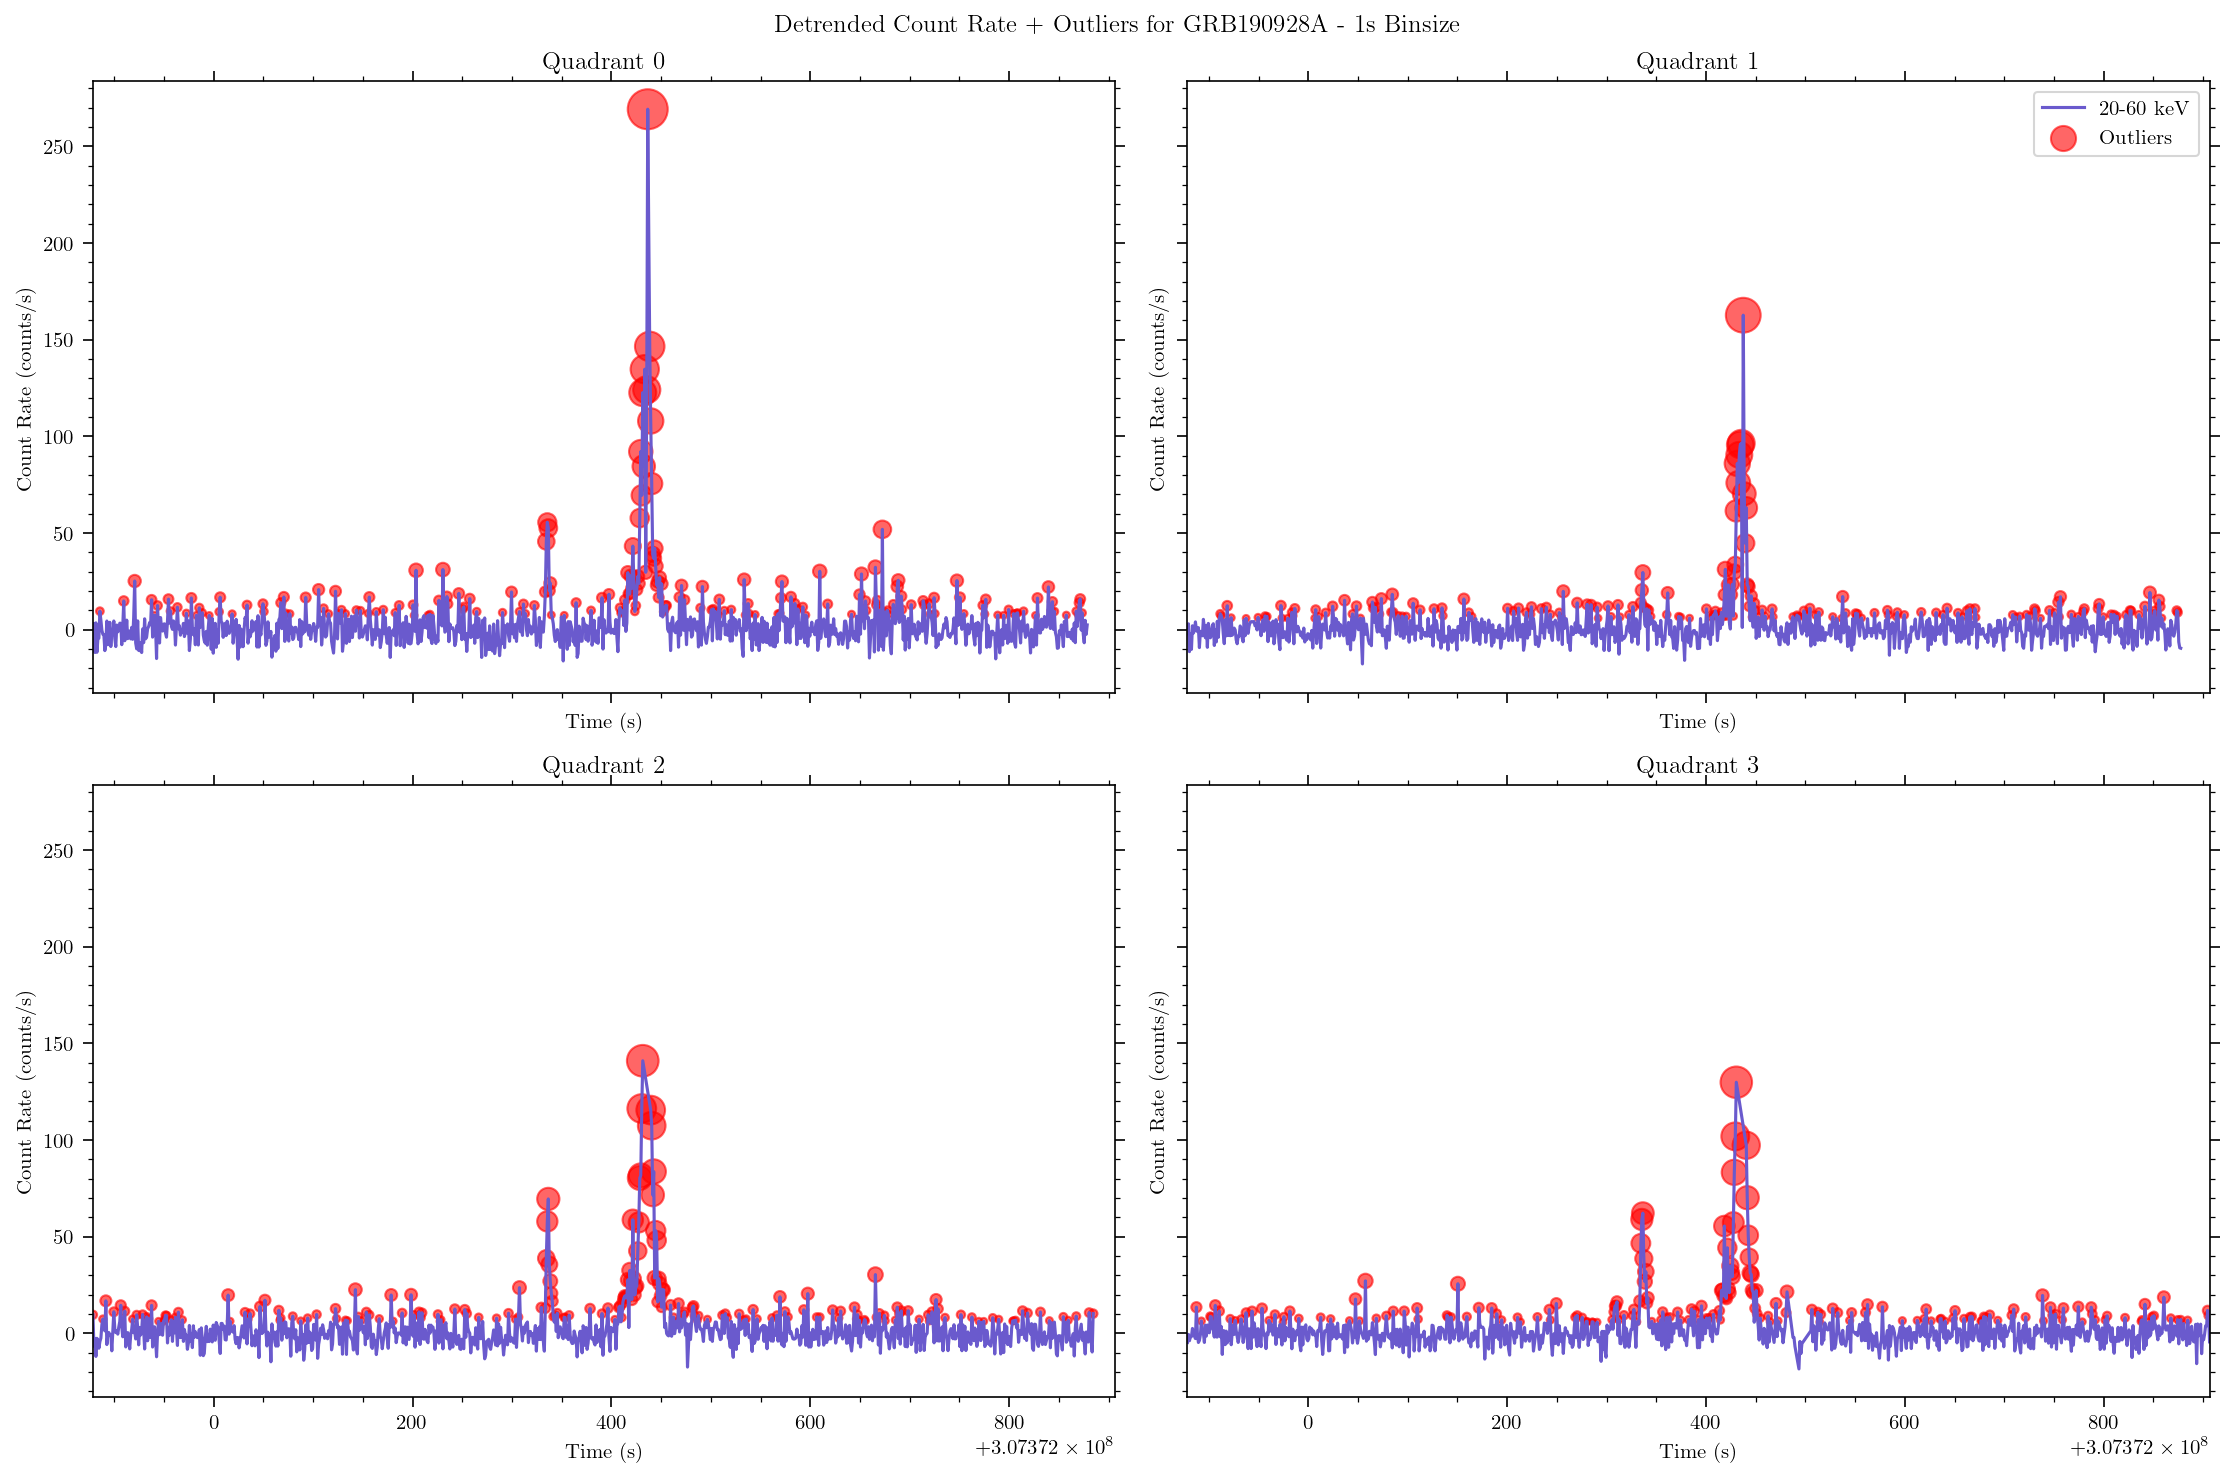

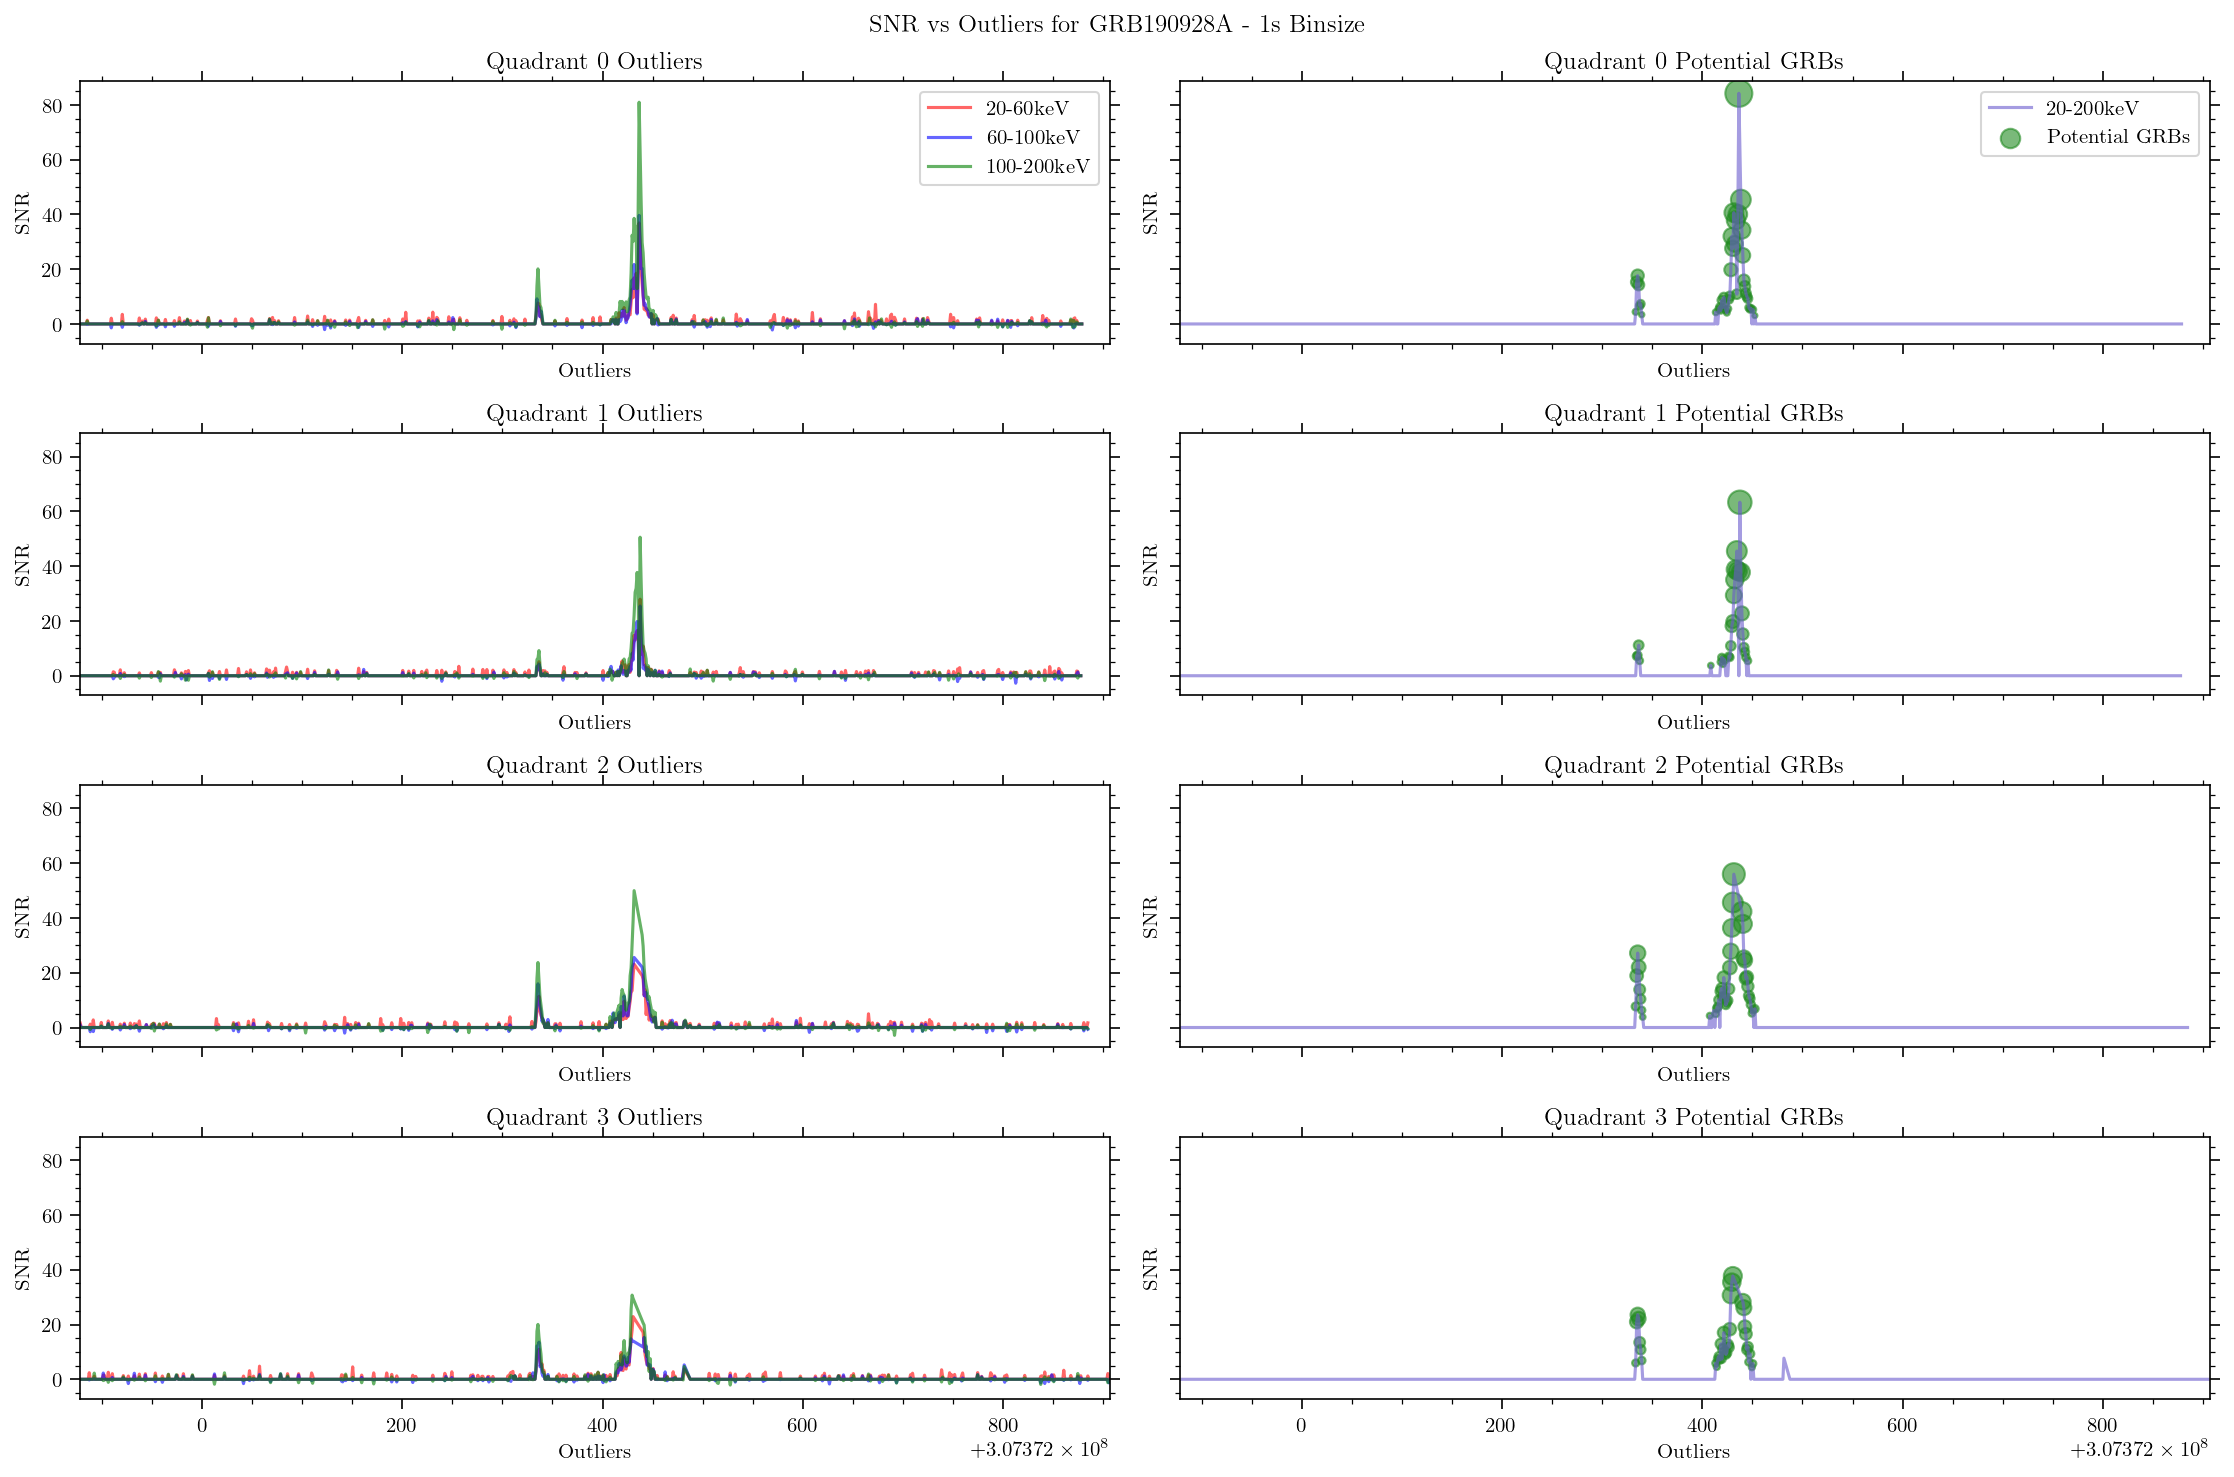

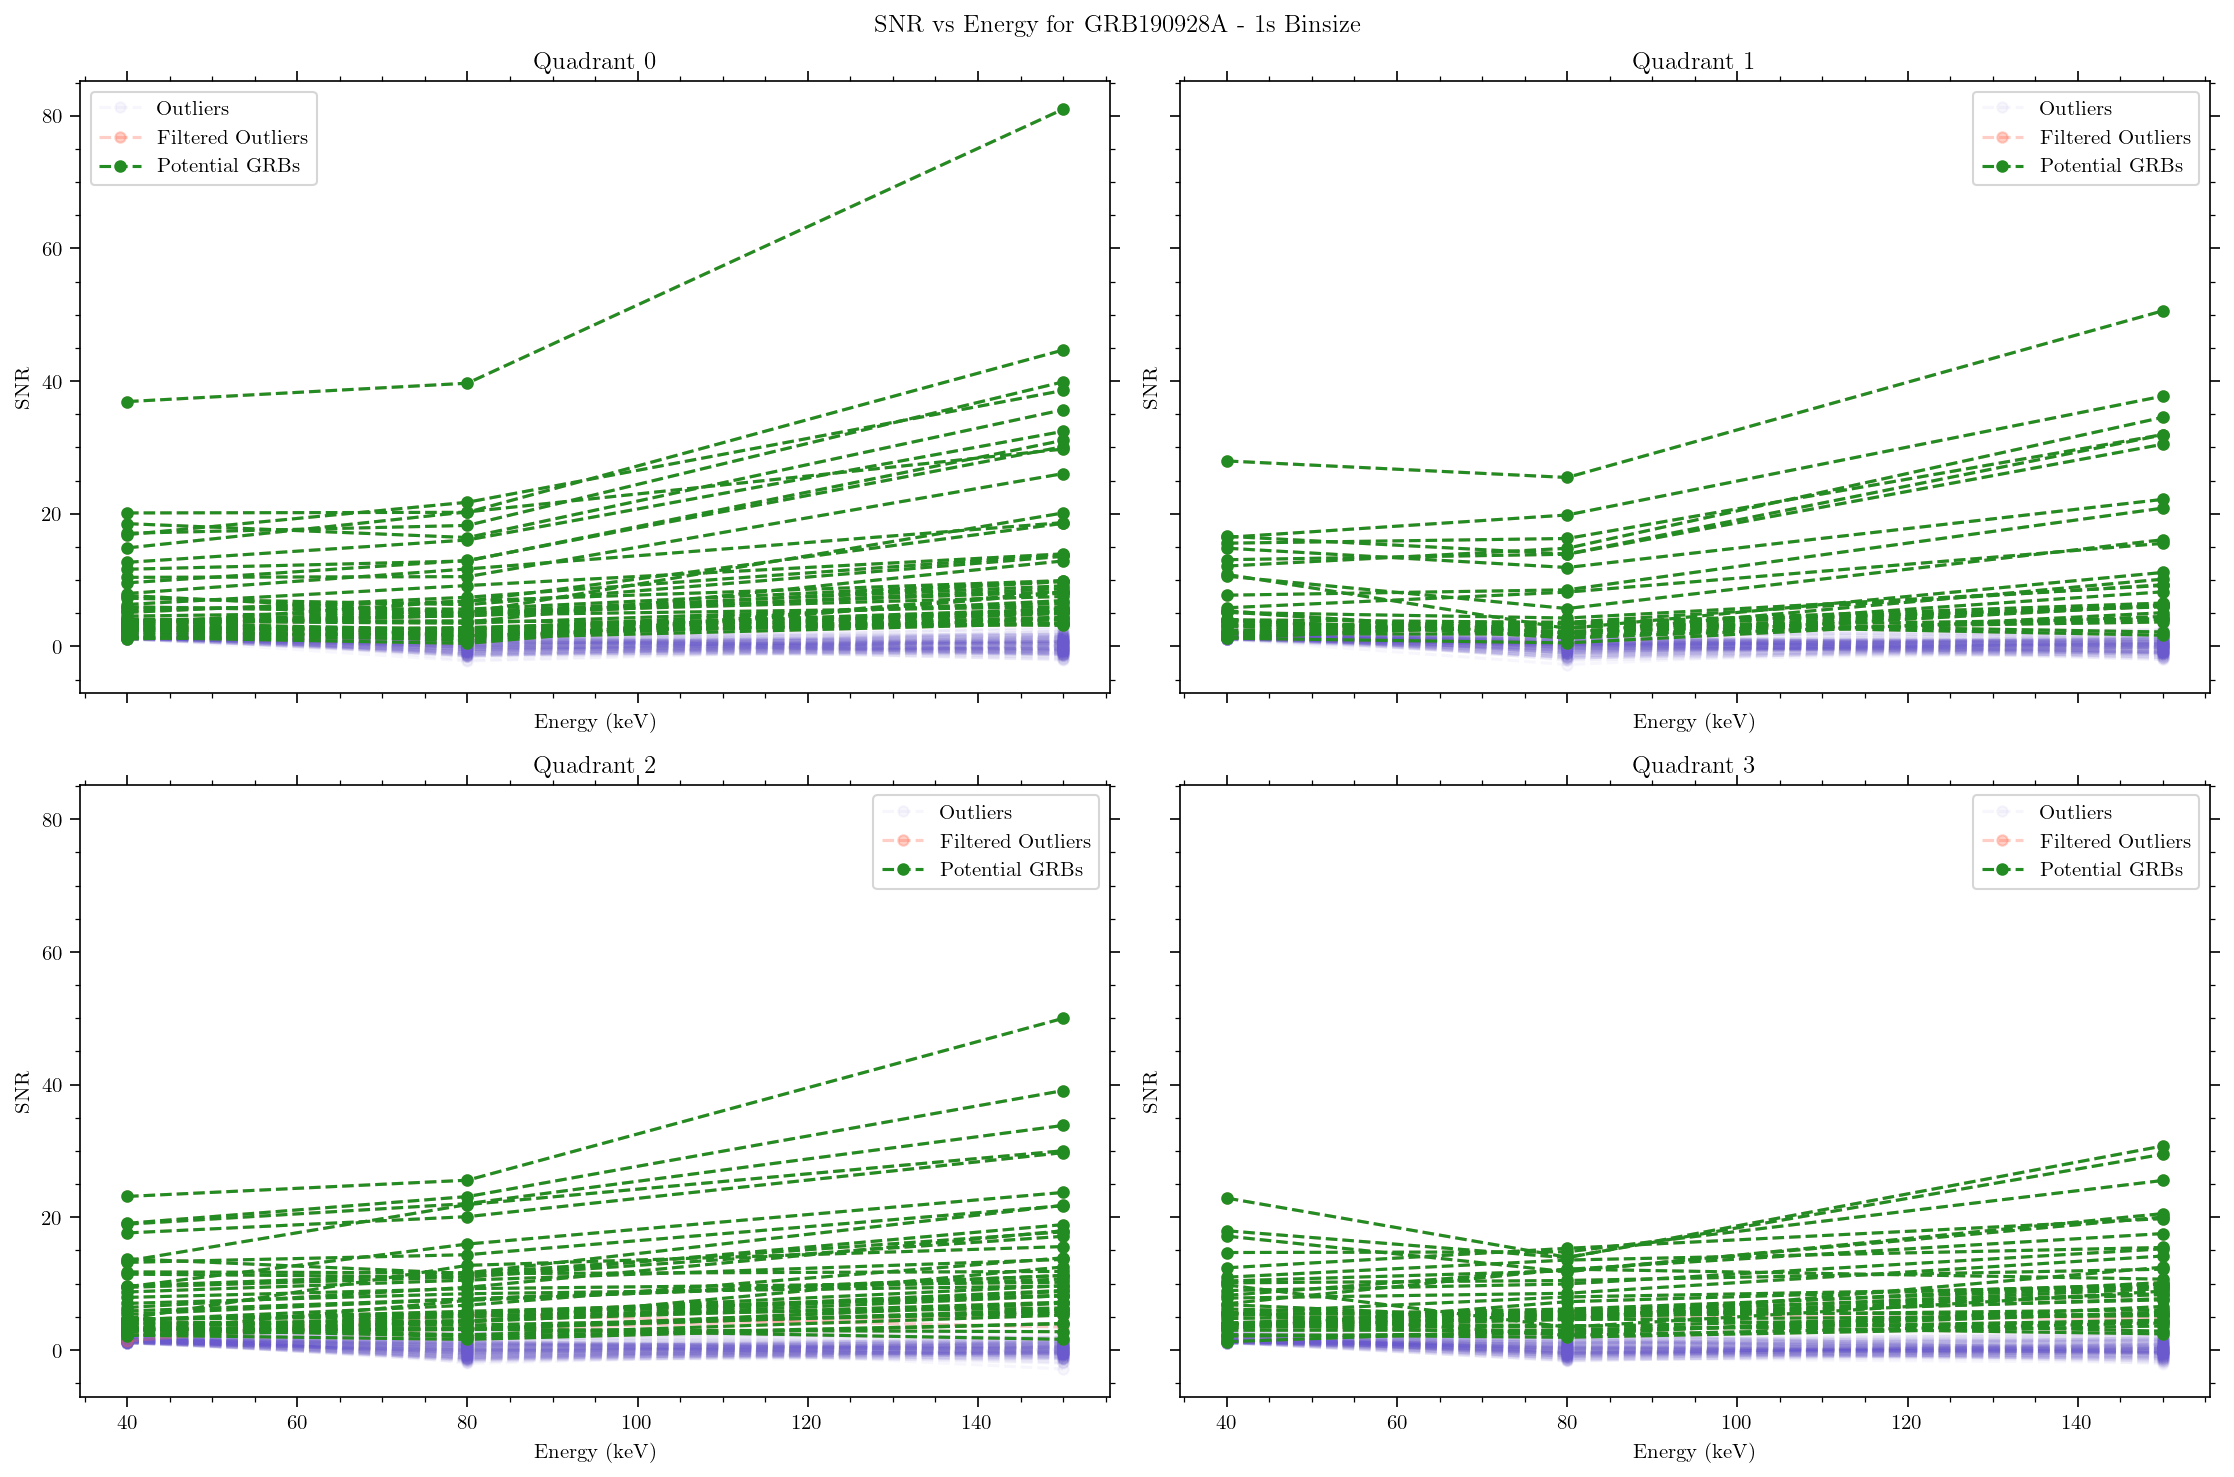

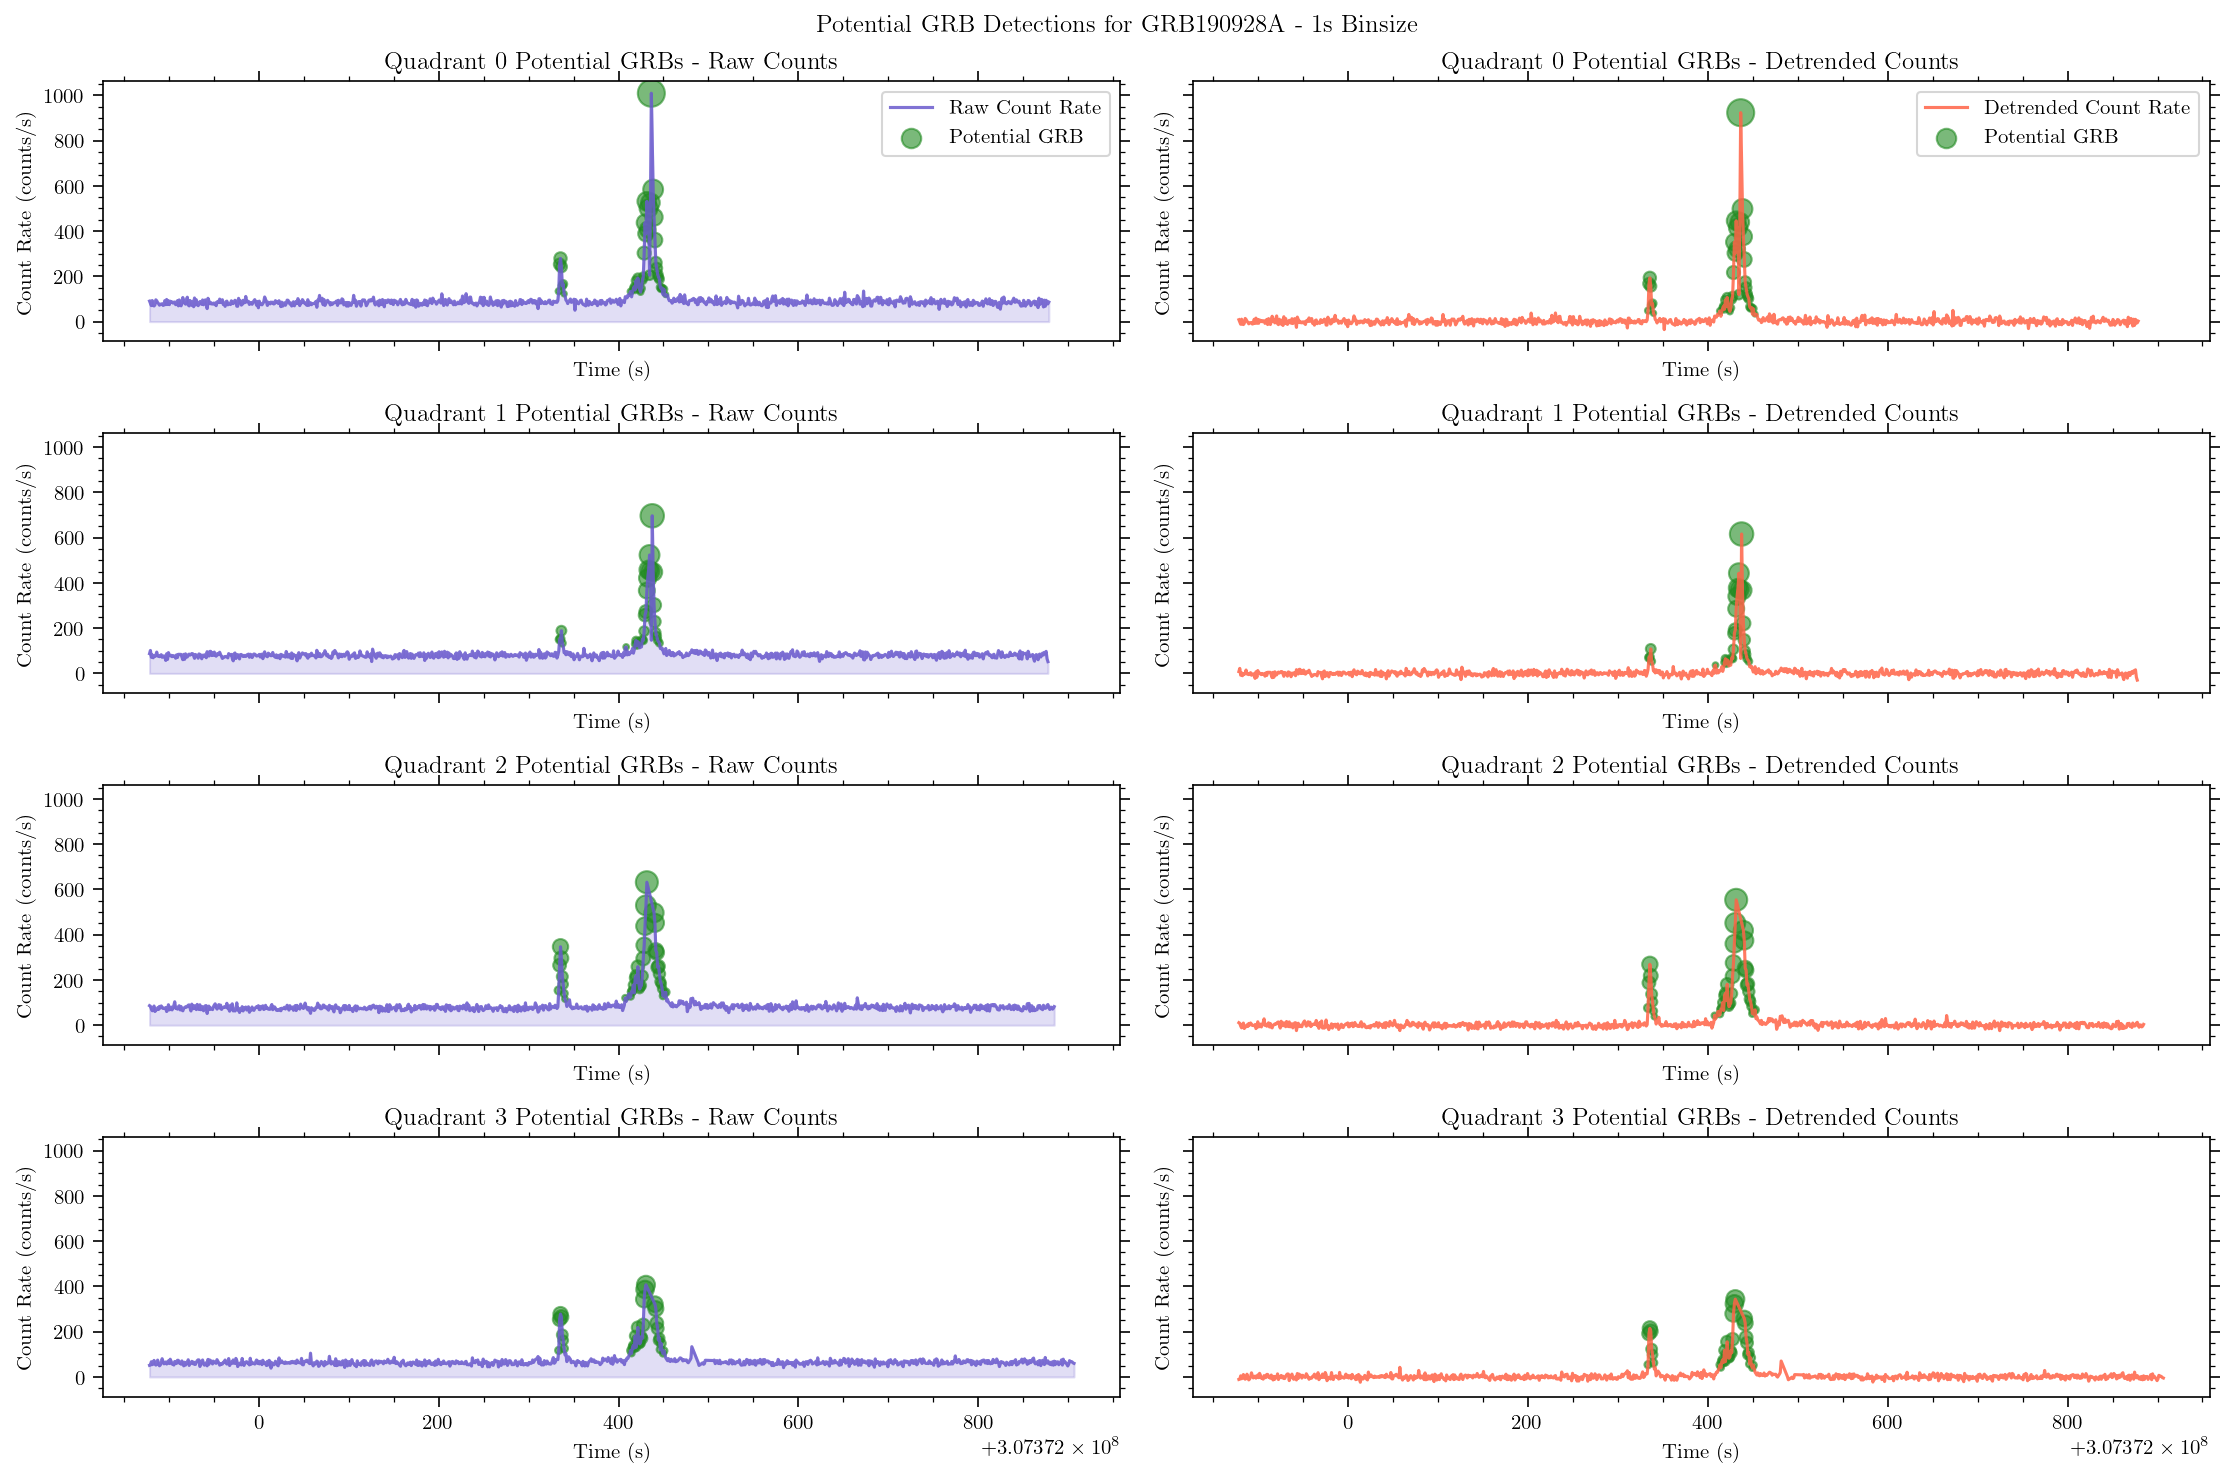

In [4]:
# plt.figure(figsize=(10, 4), dpi=200)
# plt.plot(timebins, snr, marker='o', markersize=5, color='black', linewidth=1, linestyle='--', alpha=0.5)
# plt.xlabel('Timebins (s)')
# plt.ylabel('SNR')
# plt.title('SNR vs Timebins for GRB190928A')
# optimal_timebin = timebins[np.argmax(snr)]
grb_name = "GRB190928A"
trigger_time = 307372377.0
timebin = 1
results = fs.find_outliers("/home/ravioli/astro/ksp/grbhunters/GRB190928A/1s", trigger_time, timebin, detection_sigma=1)
master_lcs = results[4]
lc_paths = np.sort(glob.glob(f"{results[5][0]}/*.lc"))

potential_grb_snrs = fs.find_potential_grbs(master_lcs, lc_paths, trigger_time, results, timebin, grb_name, plot=True)
print("Average SNR of detection: ",np.mean(potential_grb_snrs))

Text(0.5, 1.0, 'GRB210730A - Quadrant 1')

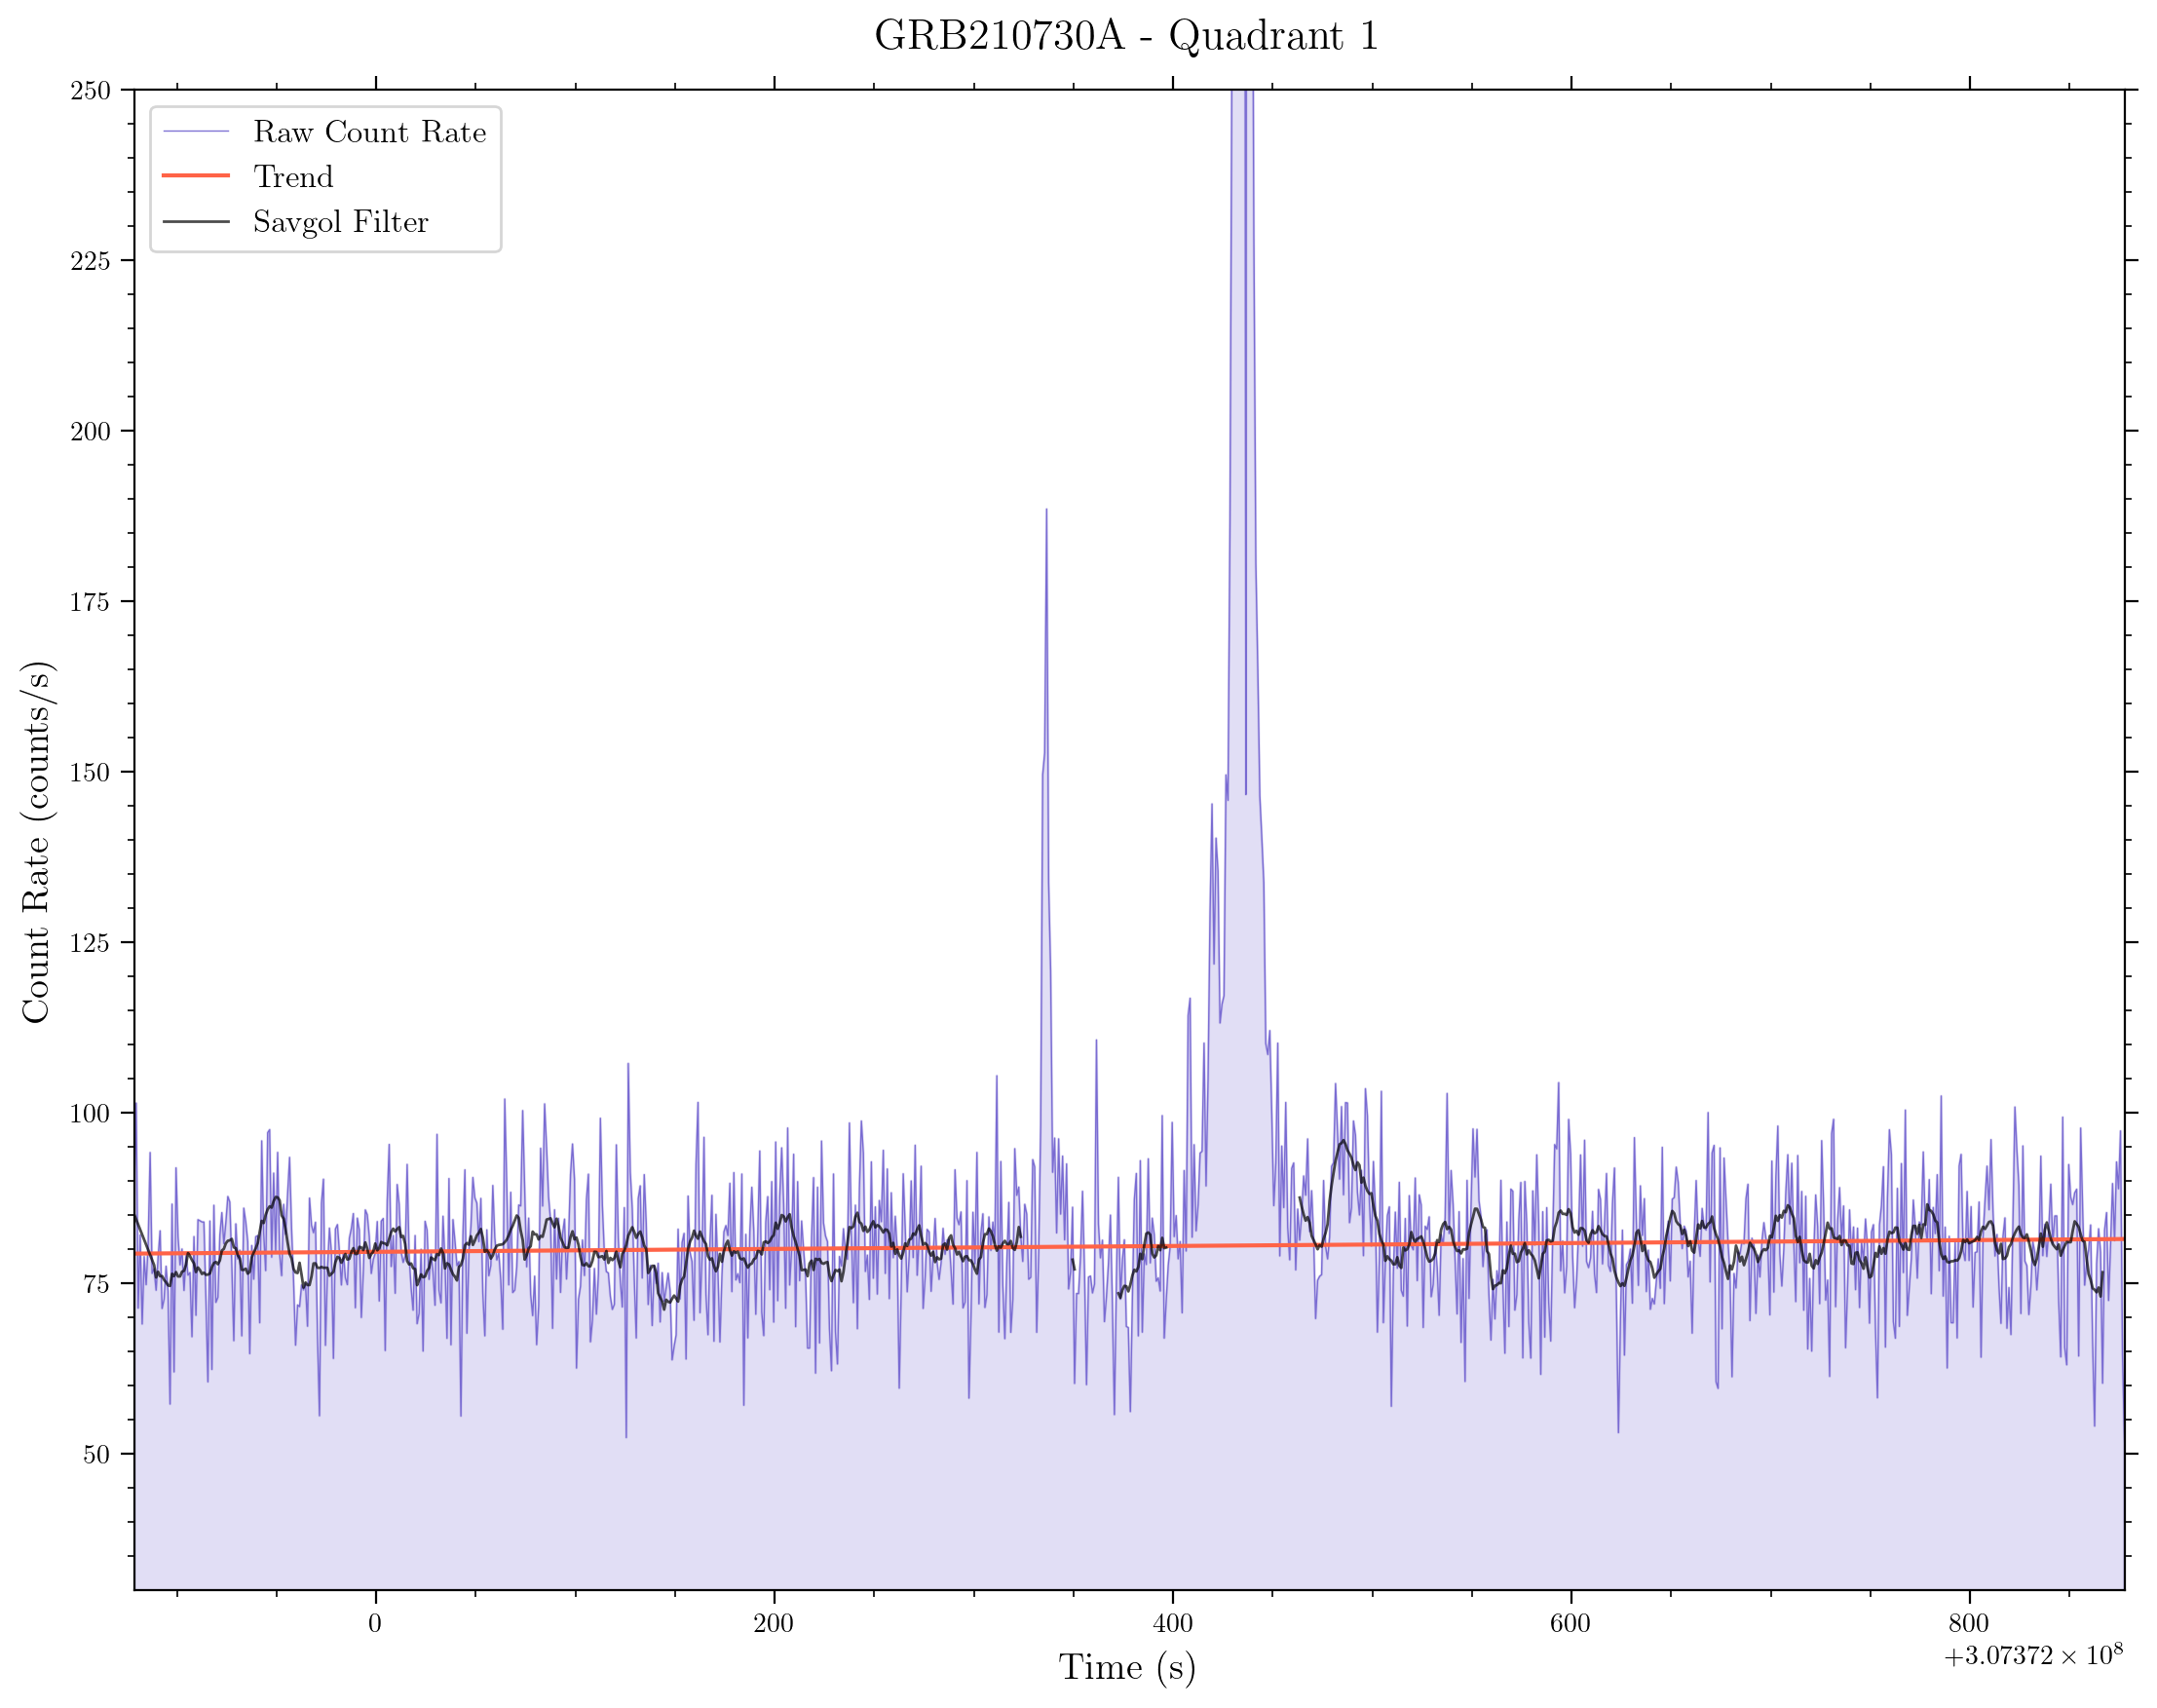

In [7]:
trigger_index = fs.get_trigger_index(master_lcs[1], 307372377.0)
detrended, raw, trend, filtered, *_ = fs.quadratic_detrend_trigger(master_lcs[1], trigger_index, polyorder=2)
detrended20to60, *_ = fs.quadratic_detrend_trigger(lc_paths[1], trigger_index, polyorder=2)
plt.figure(figsize=(13.18, 10), dpi=200)
plt.plot(raw['TIME'], raw['RATE'], color='slateblue', label='Raw Count Rate', alpha=0.85, linewidth=0.5)
plt.plot(raw['TIME'], trend, color='tomato', label='Trend', linewidth=1.5)
plt.plot(raw['TIME'], filtered, color='black', label='Savgol Filter', alpha=0.7, linewidth=1)
plt.fill_between(raw['TIME'], 0, raw['RATE'], color='slateblue', alpha=0.2)
plt.legend(loc='upper left', fontsize=12)
plt.xlim(raw['TIME'][0], raw['TIME'][-1])
plt.ylim(30, 250)
plt.xlabel("Time (s)", fontsize=14, labelpad=5)
plt.ylabel("Count Rate (counts/s)", fontsize=14, labelpad=5)
plt.title("GRB210730A - Quadrant 1", fontsize=16, pad=15)

(-20.0, 250.0)

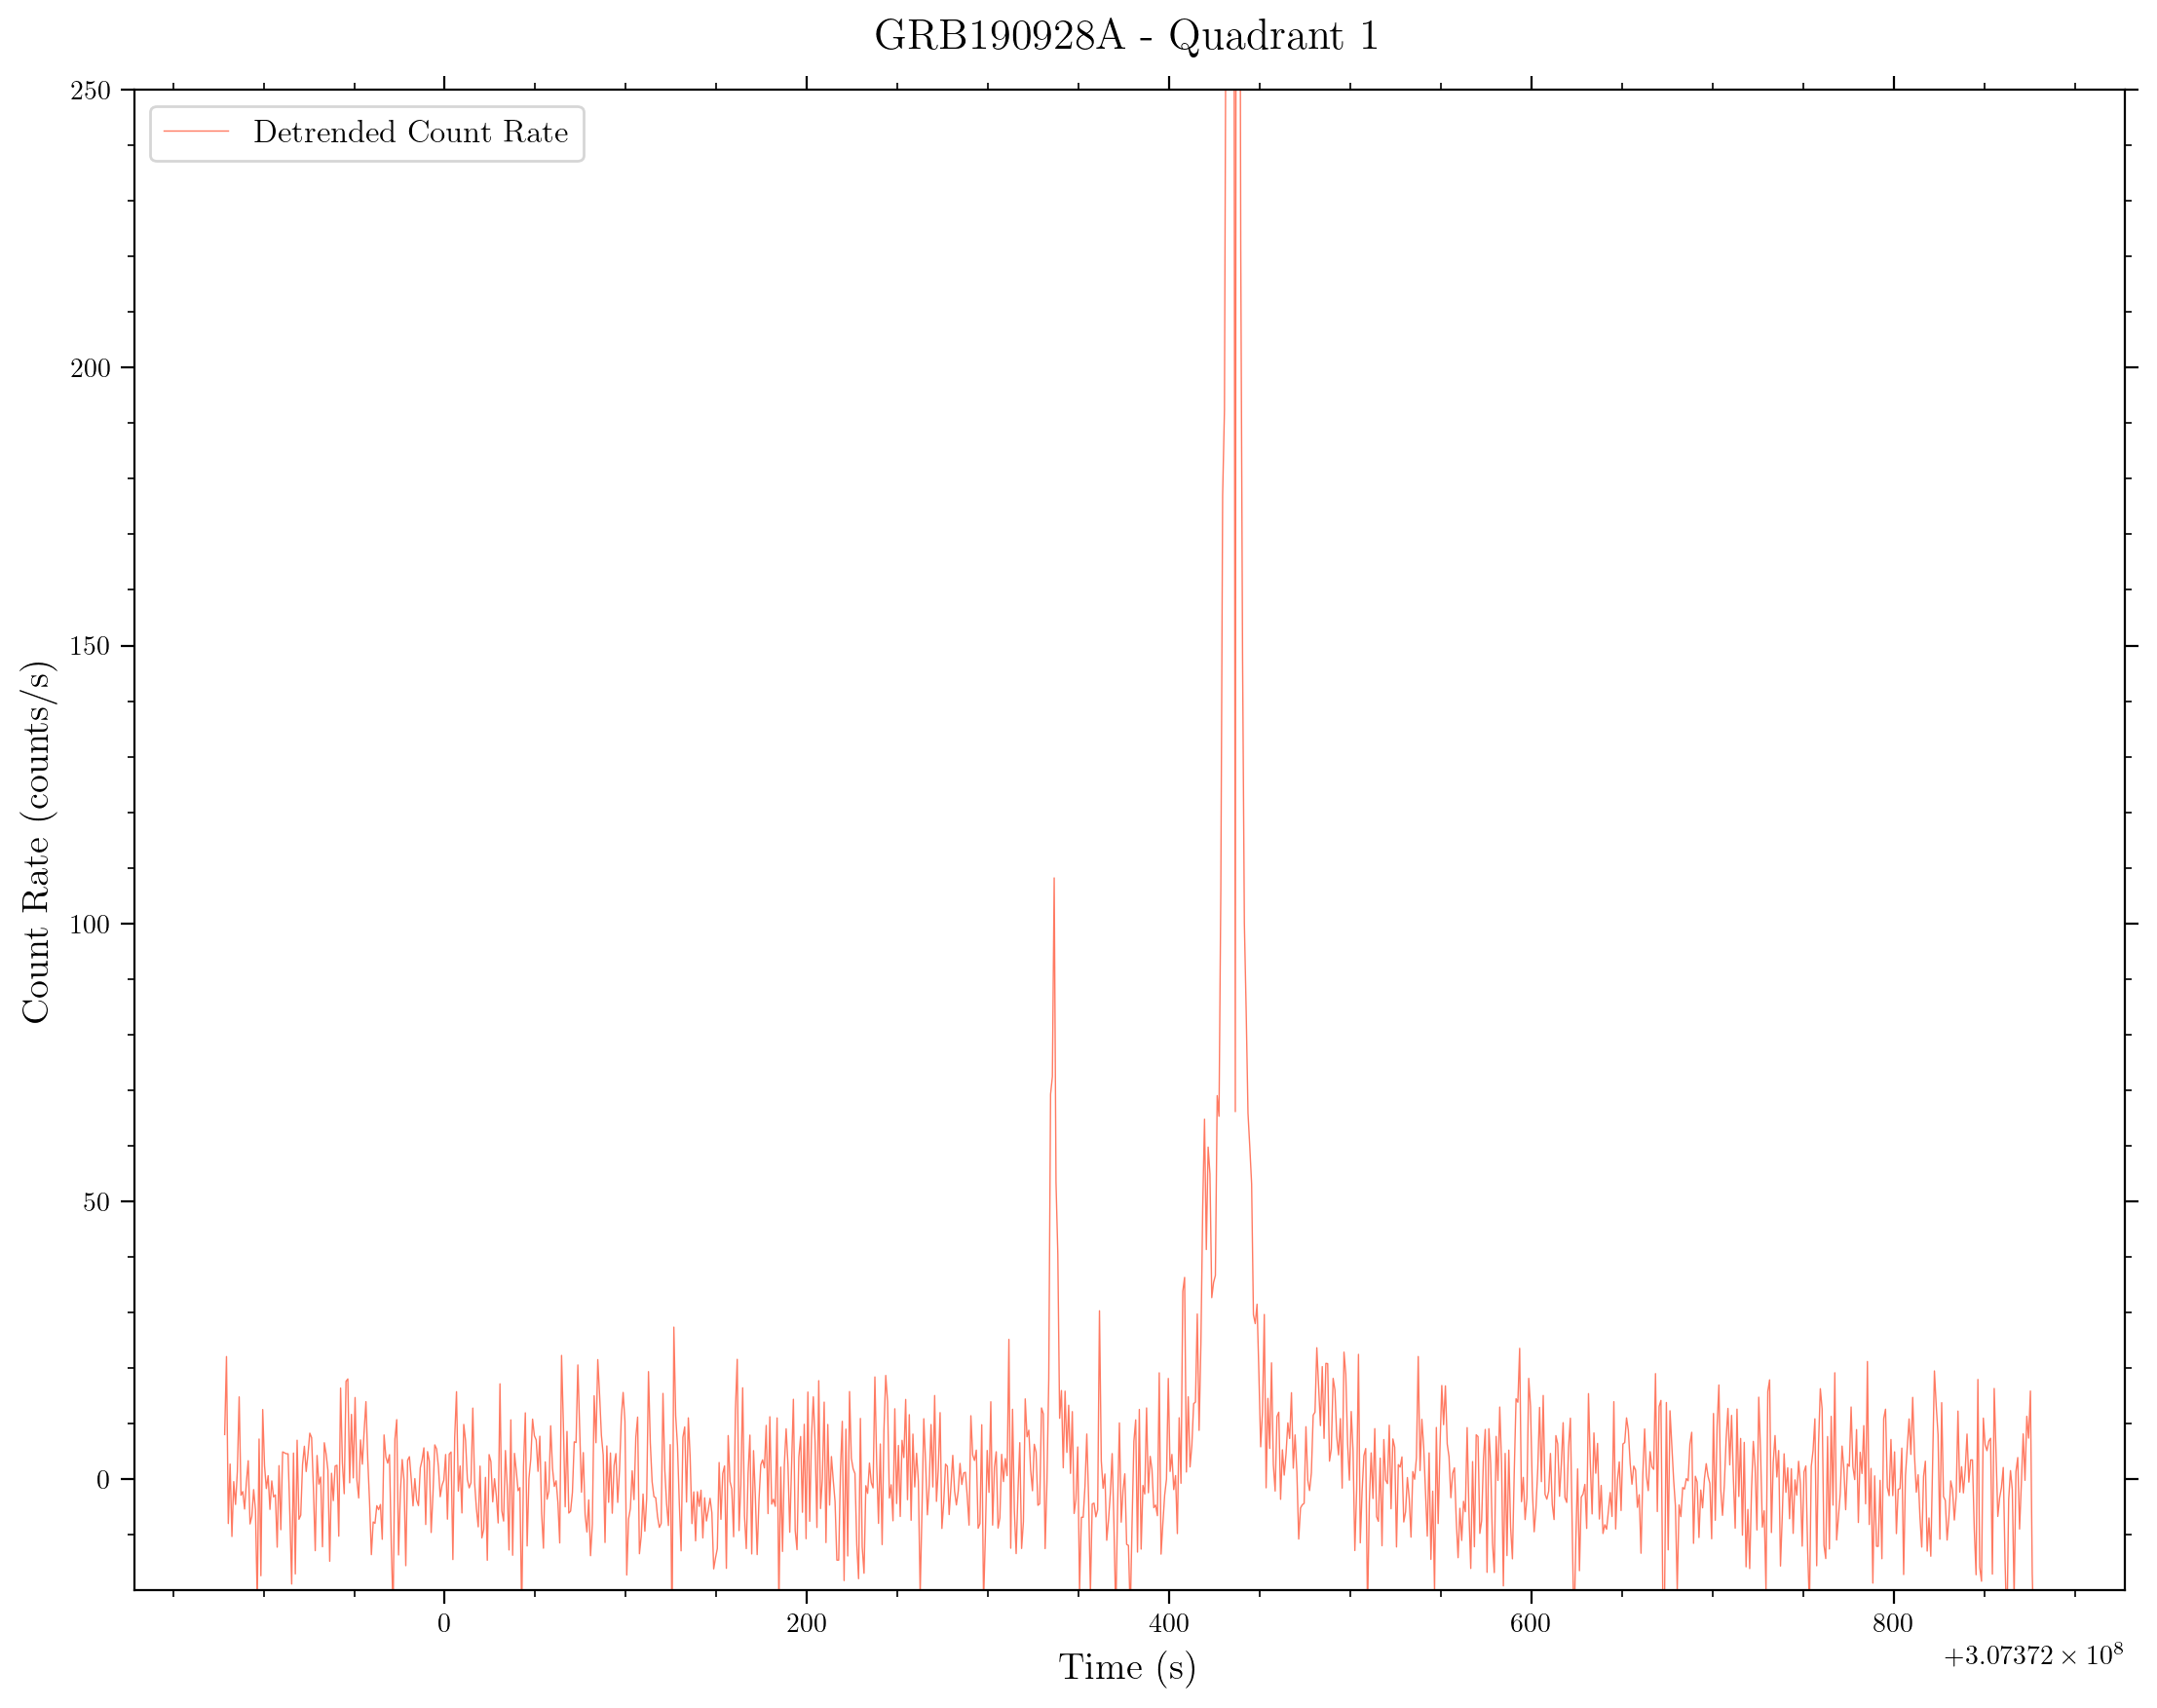

In [12]:
plt.figure(figsize=(13.18, 10), dpi=200)
plt.plot(detrended['TIME'], detrended['RATE'], color='tomato', label='Detrended Count Rate', alpha=0.85, linewidth=0.5)
plt.legend(loc='upper left', fontsize=12)
plt.xlabel("Time (s)", fontsize=14, labelpad=5)
plt.ylabel("Count Rate (counts/s)", fontsize=14, labelpad=5)
plt.title("GRB190928A - Quadrant 1", fontsize=16, pad=15)
plt.ylim(-20, 250)

Text(0.5, 1.0, 'GRB210709A - Quadrant 1')

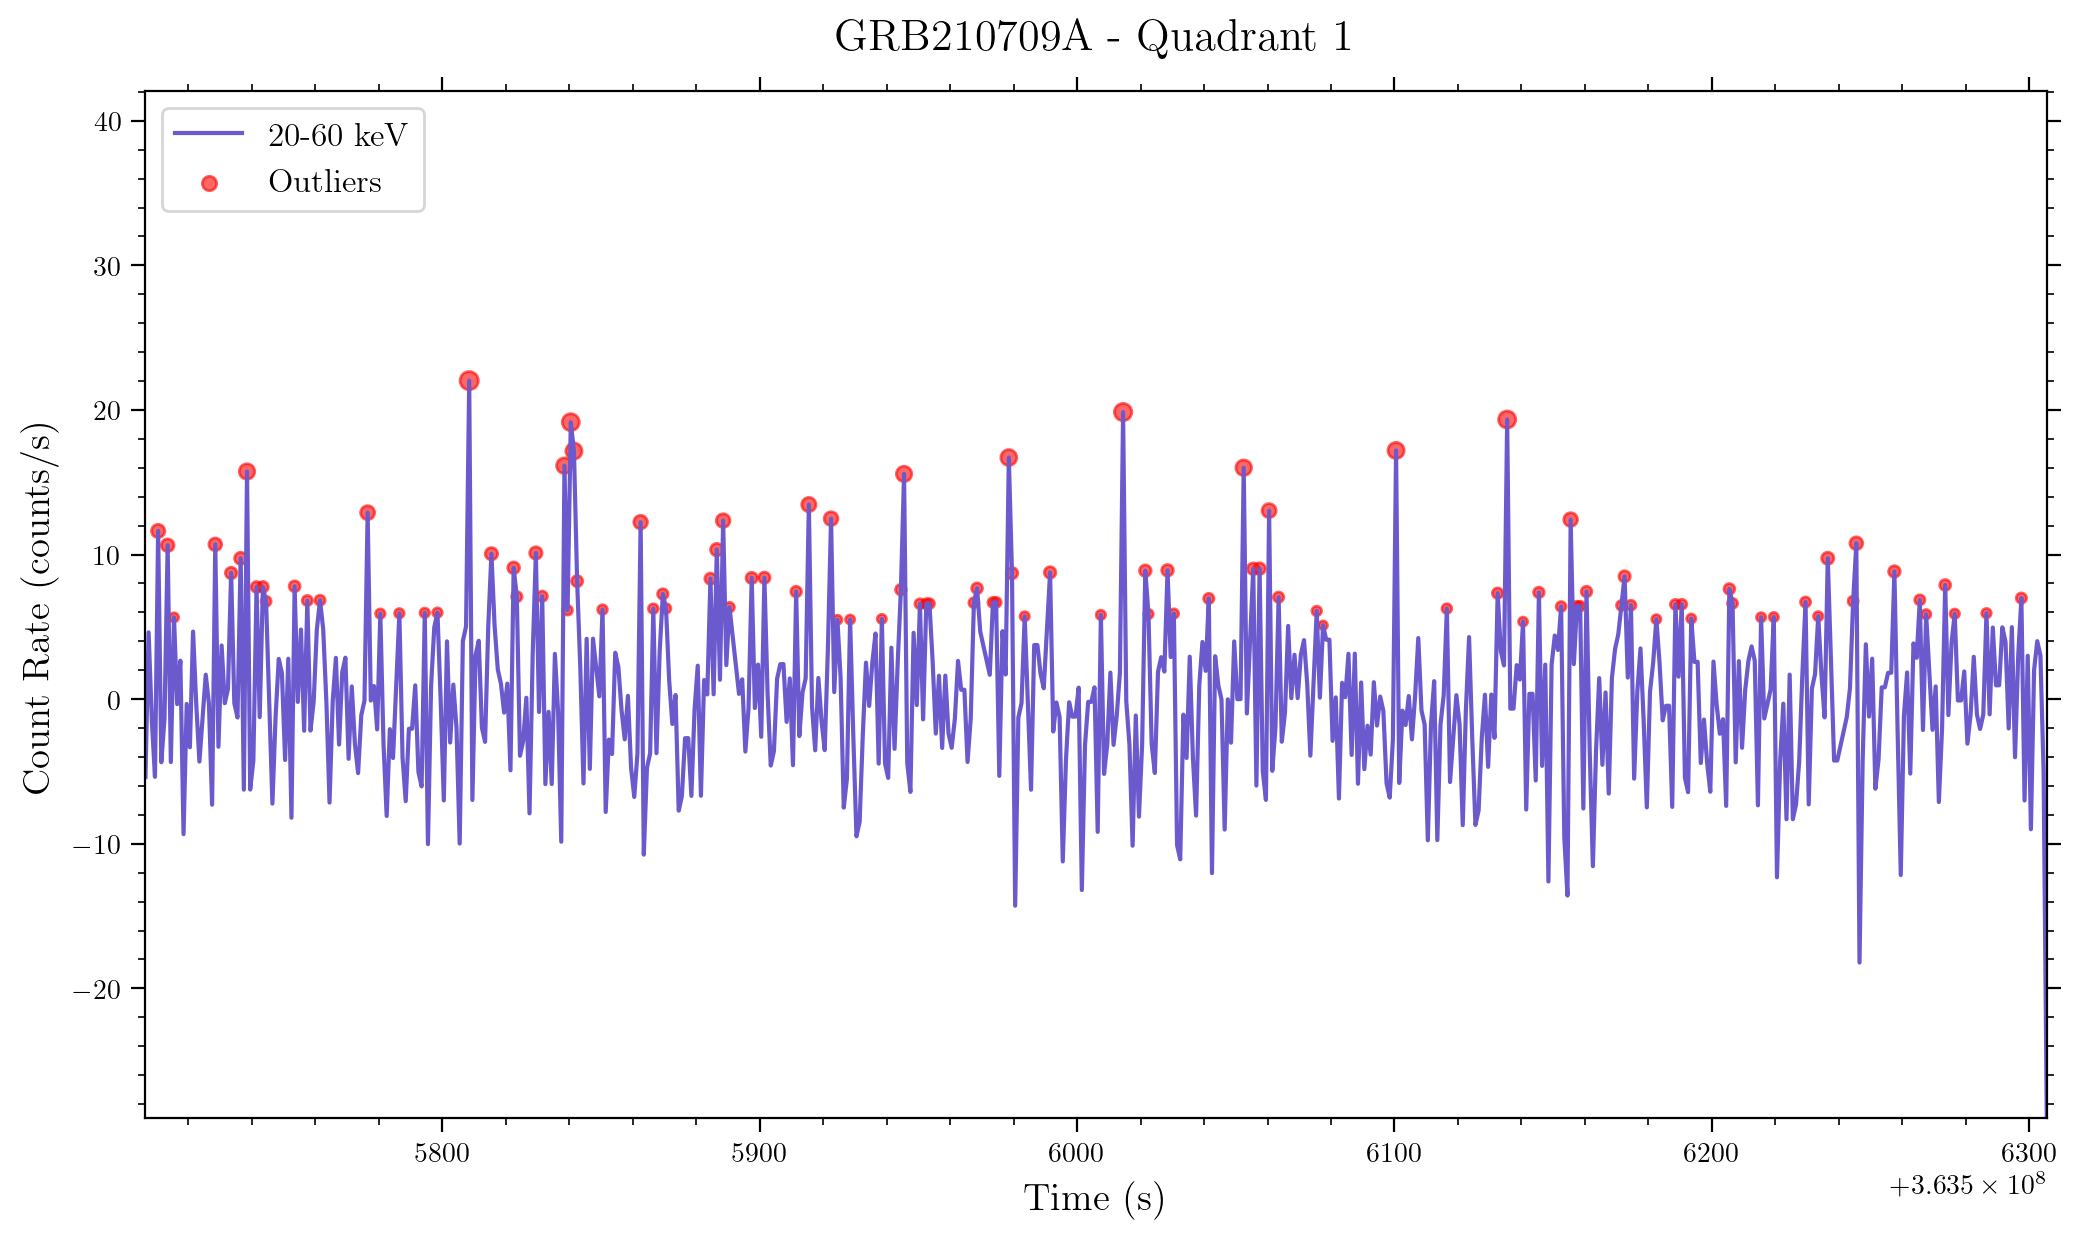

In [ ]:
snr, outliers, grb_mask, grb_snr = results[1]
plt.figure(figsize=(18.4/1.5, 10/1.5), dpi=200)
plt.plot(detrended20to60['TIME'], detrended20to60['RATE'], color='slateblue', label='20-60 keV')
plt.scatter(detrended20to60['TIME'][outliers], detrended20to60['RATE'][outliers], color='red', alpha=0.6, s=10*snr[0], label='Outliers')
plt.xlim(detrended20to60['TIME'][0], detrended20to60['TIME'][-1])
plt.ylim(min(detrended20to60['RATE']), max(detrended20to60['RATE'])+20)
plt.legend(loc='upper left', fontsize=12)
plt.xlabel("Time (s)", fontsize=14, labelpad=5)
plt.ylabel("Count Rate (counts/s)", fontsize=14, labelpad=5)
plt.title("GRB210709A - Quadrant 1", fontsize=16, pad=15)

In [ ]:
lc3bin1 = fs.quadratic_detrend_trigger("/home/ravioli/astro/ksp/grb/GRB190928A/1s/3_bins/20-60/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc", 1802)[0]
lc3bin2 = fs.quadratic_detrend_trigger("/home/ravioli/astro/ksp/grb/GRB190928A/1s/3_bins/60-100/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc", 1802)[0]
lc3bin3 = fs.quadratic_detrend_trigger("/home/ravioli/astro/ksp/grb/GRB190928A/1s/3_bins/100-200/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc", 1802)[0]
grb_time = (307372000, 307373000)

Master light curve already exists at /home/ravioli/astro/ksp/grb/GRB190928A/1s/master_lc
Requested energy bins already exist at /home/ravioli/astro/ksp/grb/GRB190928A/1s/3_bins


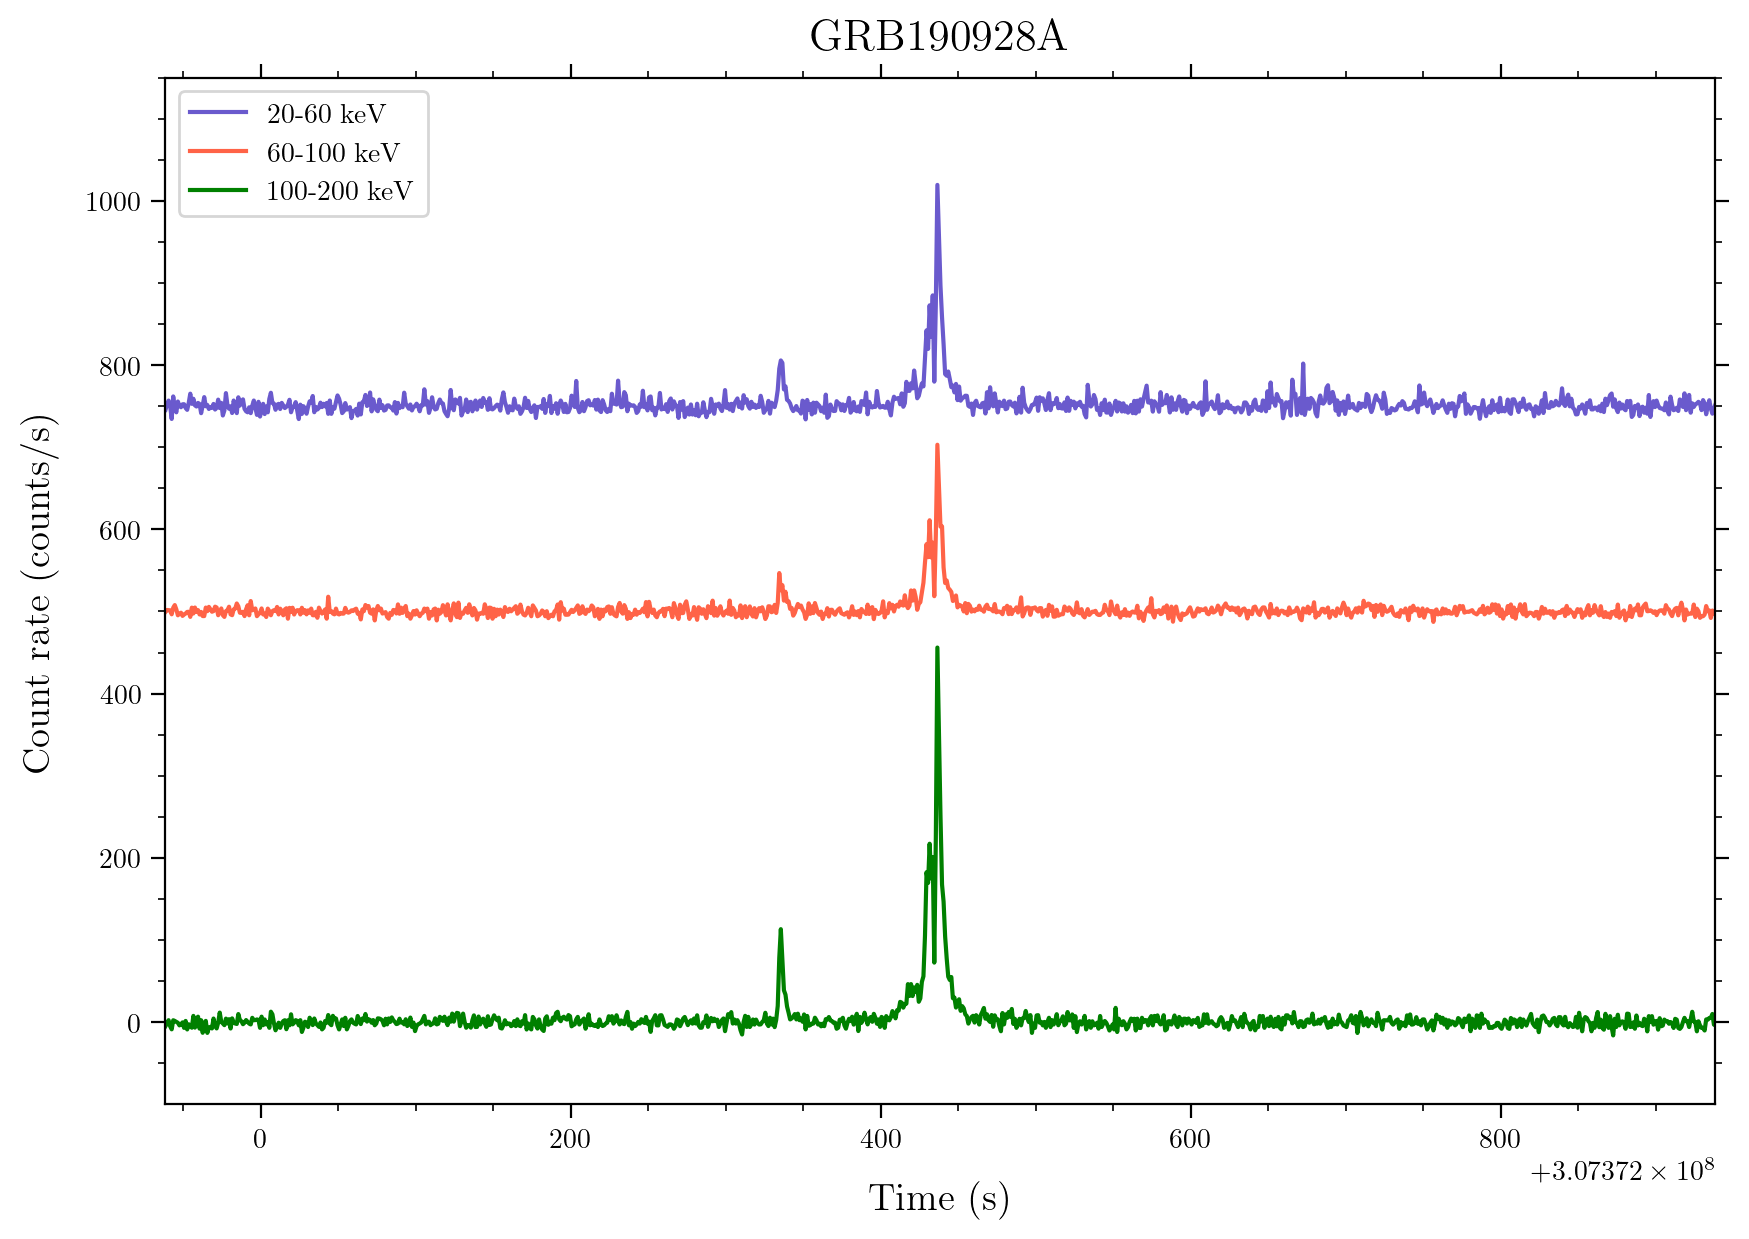

In [ ]:
results = fs.find_grb("/home/ravioli/astro/ksp/grb/GRB190928A/1s", 307372437.0, 3)
outliers = results[0][1]
plt.figure(figsize=(15/1.5, 10/1.5), dpi=200)
plt.plot(lc3bin1['TIME'], lc3bin1['RATE']+750, color='slateblue', label='20-60 keV')
plt.plot(lc3bin2['TIME'], lc3bin2['RATE']+500, color='tomato', label='60-100 keV')
plt.plot(lc3bin3['TIME'], lc3bin3['RATE'], color='green', label='100-200 keV')
# plt.vlines(lc3bin1['TIME'][outliers], -100, 1200, linestyles='--', color='black', alpha=0.5, label="Outliers")
plt.xlim(lc3bin1['TIME'][0], lc3bin1['TIME'][-1])
plt.ylim(-100, 1150)
plt.xlabel("Time (s)", labelpad=10, fontsize=14)
plt.ylabel("Count rate (counts/s)", labelpad=10, fontsize=14)
plt.title("GRB190928A", pad=10, fontsize=16)
plt.legend(loc='upper left')